In [1]:
# append rxn_yield_context to the PYTHONPATH
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from tqdm import tqdm
import pandas as pd

new_path = 'D:\\Retro\\rxn_yield_context'
sys.path.append(new_path)
print(sys.path)
target_dir = "../All_LCC_Data/processed_data_12"

C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


['D:\\Retro\\rxn_yield_context\\rxn_yield_context\\analyze', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\python37.zip', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\DLLs', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37', '', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\win32', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\win32\\lib', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\Pythonwin', 'C:\\Users\\sun73\\anaconda3\\envs\\old_py37\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\sun73\\.ipython', 'D:\\Retro\\rxn_yield_context']


In [2]:
# Get the number of each reaction set
reaxys_dir = "../../Data_From_Reaxys_Original"
dir_names = ['Buchwald-Hartwig Cross-Coupling','Diels Alder', 'Fischer Indole Synthesis', 
             'Friedel-Crafts Acylation', 'Friedel-Crafts Alkylation', 'Grignard Reaction',
             'Hydrogenation', 'Hydrolysis', 'Negishi Couplings', 
             'Pauson Khand Reaction', 'Reductive Amination', 'Suzuki Coupling']


def basic_preprocess(data_path):
    keep_index = ['Reaction ID', 'Reaction', 'Temperature (Reaction Details) [C]', 
                  'Yield (numerical)','Reagent', 'Solvent (Reaction Details)']
    data = pd.read_excel(data_path)
    drop_index = list(data.columns)
    for index in list(data.columns):
        if index in keep_index:
            drop_index.remove(index)
    data = data.drop(drop_index,axis=1)
    data = data[:-3] # copyright or something 
    return data

def reaction_entry(reaction_ids):
    now = '0'
    number = 0
    for id_ in reaction_ids:
        if id_ != now:
            number += 1
            now = id_
    return number
            
records = dict()
raw_datas = dict()
    
file_path = os.path.join(reaxys_dir, dir_names[0])
a = os.listdir(file_path)
for dir_name in tqdm(dir_names):
    file_path = os.path.join(reaxys_dir, dir_name)
    for i, file_name in enumerate(os.listdir(file_path)):
        data_path = os.path.join(file_path, file_name)
        if i == 0:
            reaction_set = basic_preprocess(data_path)
        else:
            data = basic_preprocess(data_path)
            reaction_set = reaction_set.append(data, ignore_index=True)
    
    records.update({dir_name: [reaction_entry(reaction_set['Reaction ID']), len(reaction_set['Reaction ID'])]})
    raw_datas.update({dir_name : reaction_set})


  0%|                                                                                                                                | 0/12 [00:00<?, ?it/s]C:\Users\sun73\anaconda3\envs\old_py37\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [09:40<00:00, 48.42s/it]


In [3]:
list(zip(*records.items()))[1]

([26774, 43862],
 [19565, 26590],
 [6869, 8633],
 [10476, 25844],
 [17799, 31396],
 [14019, 23628],
 [41341, 121787],
 [39322, 73860],
 [11514, 13521],
 [3542, 4270],
 [50668, 58480],
 [193511, 255590])

{'Buchwald-Hartwig Cross-Coupling': [26774, 43862], 'Diels Alder': [19565, 26590], 'Fischer Indole Synthesis': [6869, 8633], 'Friedel-Crafts Acylation': [10476, 25844], 'Friedel-Crafts Alkylation': [17799, 31396], 'Grignard Reaction': [14019, 23628], 'Hydrogenation': [41341, 121787], 'Hydrolysis': [39322, 73860], 'Negishi Couplings': [11514, 13521], 'Pauson Khand Reaction': [3542, 4270], 'Reductive Amination': [50668, 58480], 'Suzuki Coupling': [193511, 255590]}
Before data preprocessed:
Number of reaction entries: 435400
Number of condtion entries: 687461


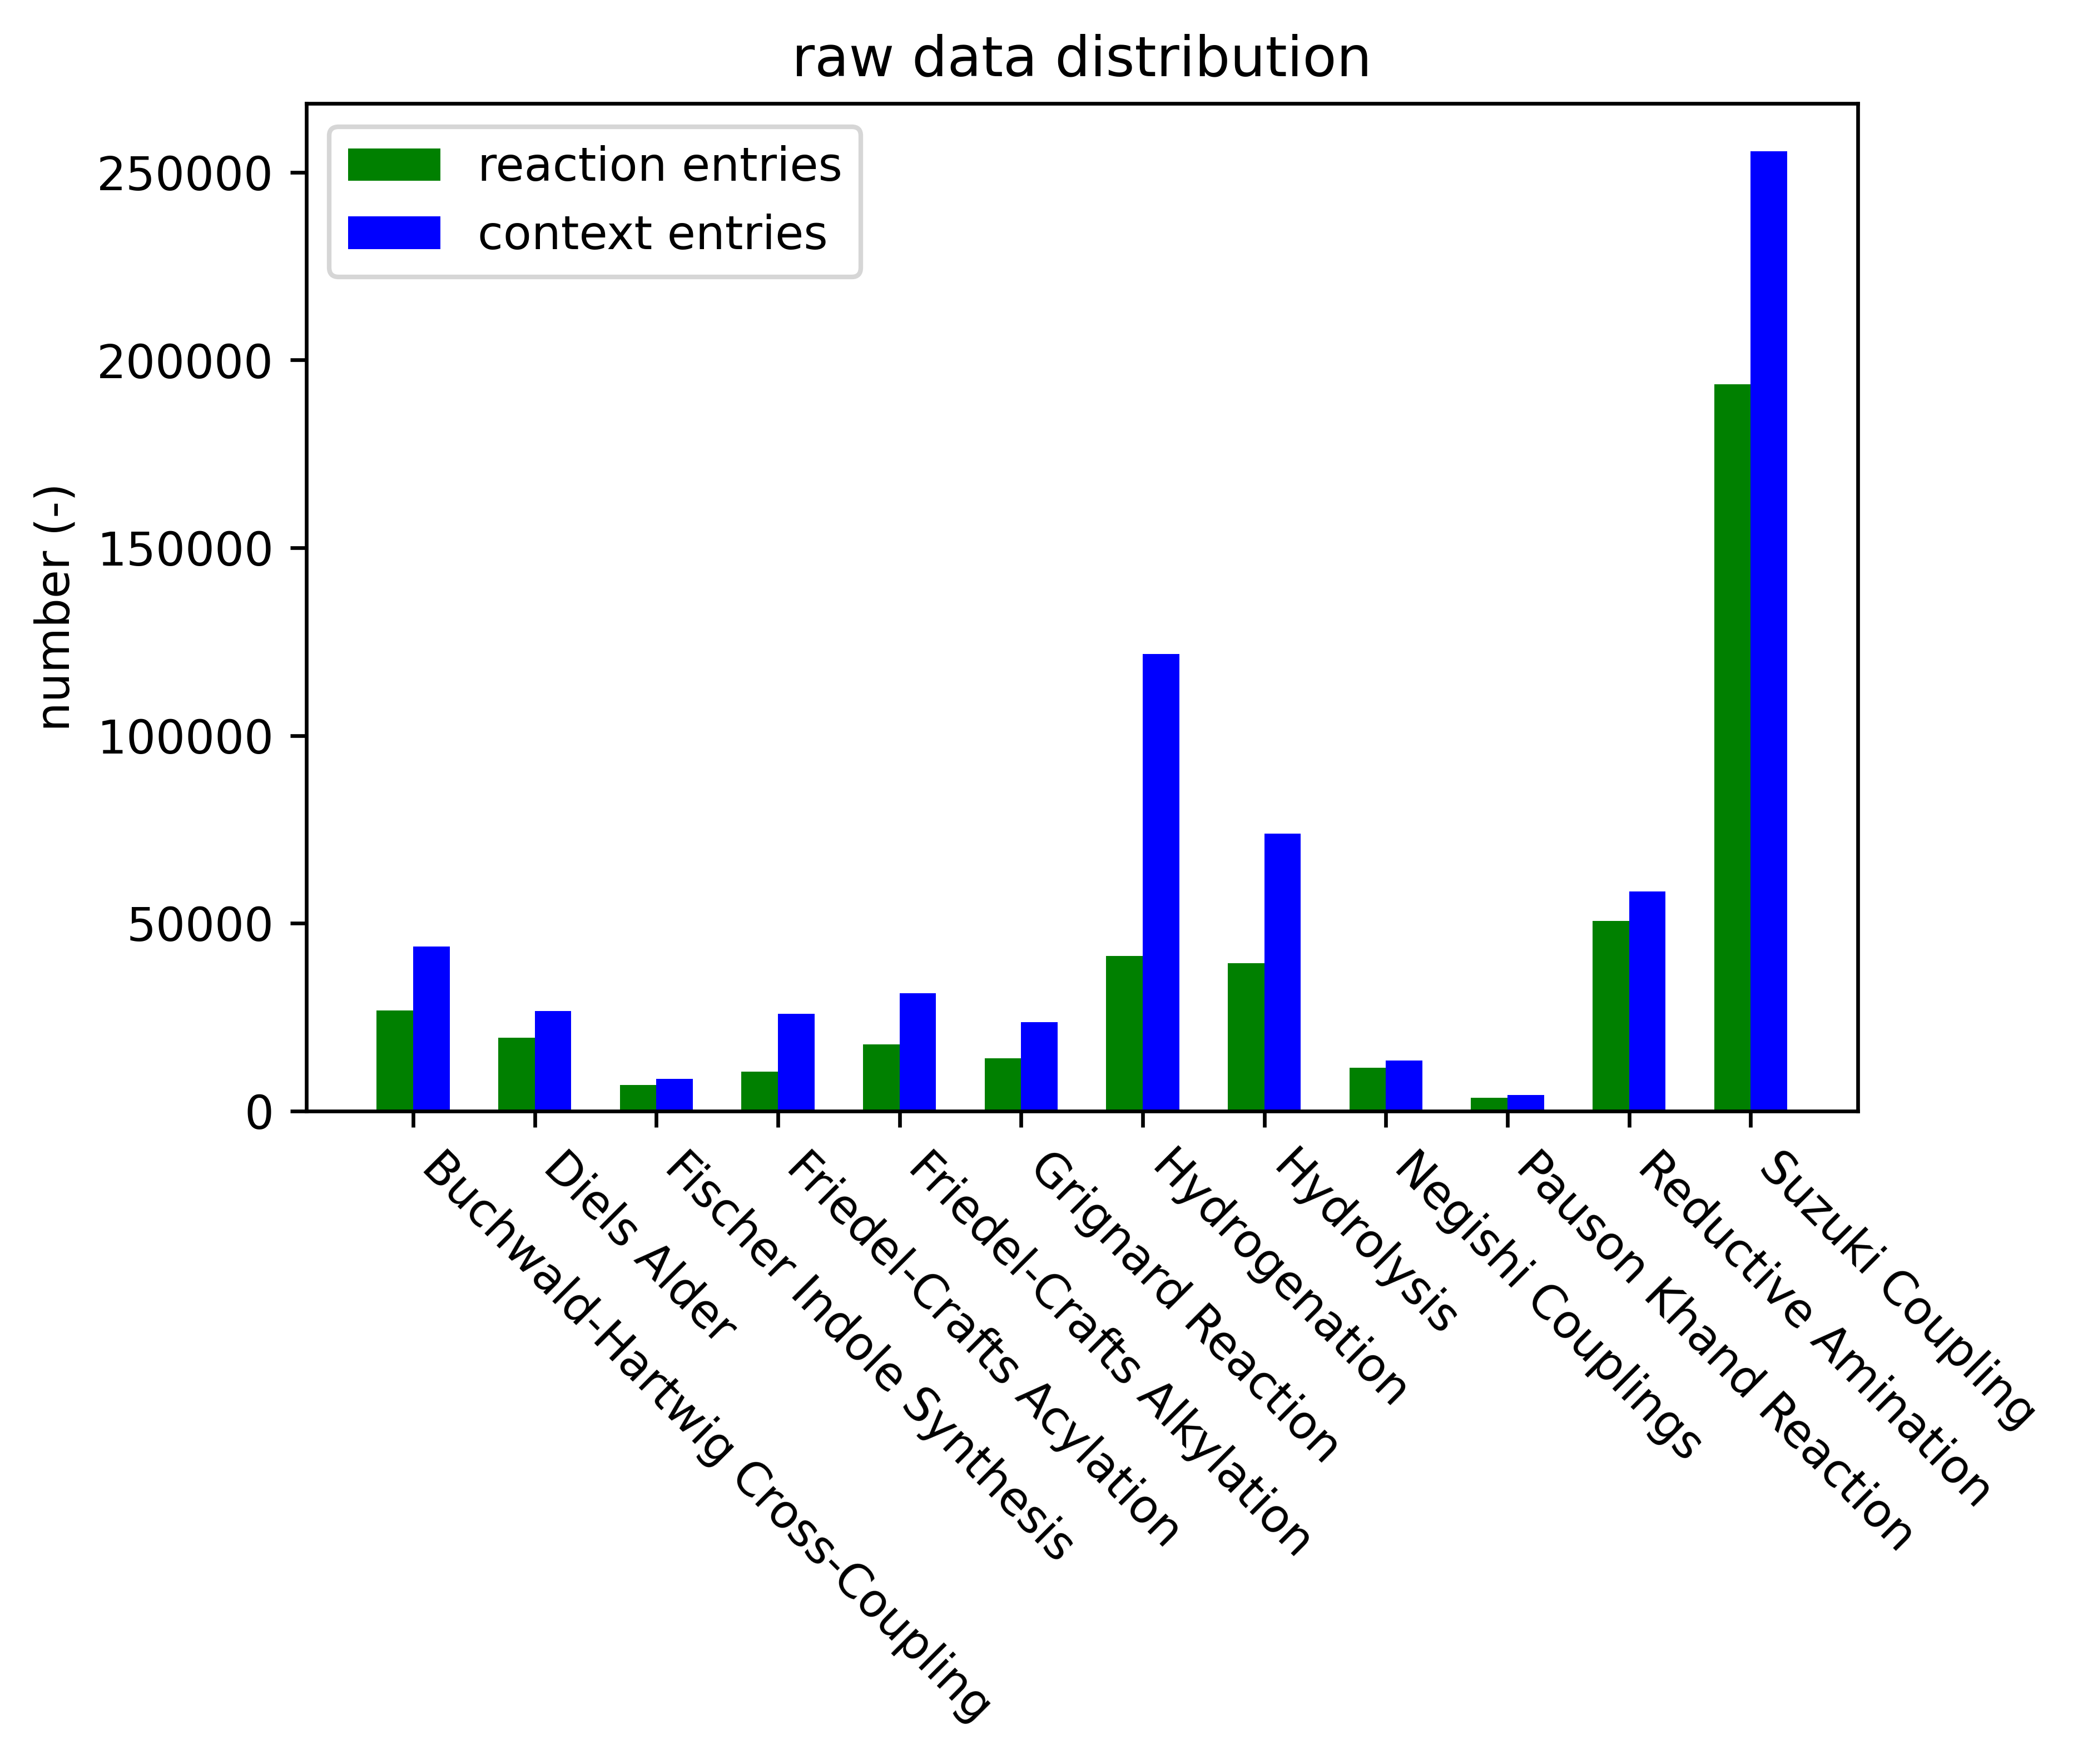

In [3]:
def reaction_entry(reaction_ids):
    now = '0'
    number = 0
    for id_ in reaction_ids:
        if id_ != now:
            number += 1
            now = id_
    return number

def data_distribution(records, title = ''):
    reaction_names, entries = list(zip(*records.items()))
    reaction_entry, context_entry = list(zip(*entries))
    x = np.arange(len(reaction_names))
    width = 0.3
    plt.figure(dpi = 600)
    plt.bar(x, reaction_entry, width, color='green', label='reaction entries')
    plt.bar(x + width, context_entry, width, color='blue', label='context entries')
    plt.xticks(x + width / 2, reaction_names, rotation=-45, ha='left')
    plt.ylabel('number (-)')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0,1), loc='upper left')
    plt.show()


print(records)
reaction_entries = 0
condition_entries = 0
for key, value in records.items():
    reaction_entries += value[0]
    condition_entries += value[1]

print('Before data preprocessed:')
print('Number of reaction entries: {}'.format(reaction_entries))
print('Number of condtion entries: {}'.format(condition_entries))
data_distribution(records, 'raw data distribution')

In [4]:
# Prepare a dictionary to search what reaction a Reaction ID belongs to.
# ['Diels_Alder', 'Hydrolysis', 'Hydrogenation', 'ReductiveAmination','PausonKhandReaction', 'NegishiCouplings']

Reaction_ID_search = dict()
for reaction_name, data in raw_datas.items():
    for reaction_id in data['Reaction ID']:
        Reaction_ID_search.update({reaction_id: reaction_name})

print(len(Reaction_ID_search)) 
Reaction_ID_search['28100547']

434110


'Diels Alder'

In [5]:
def get_txt_data(input_path):
    f = open(input_path, 'r')
    data = f.readlines()
    f.close()
    return data


train_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_train_labels_processed.txt'))
validate_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_validate_labels_processed.txt'))
test_data = get_txt_data(os.path.join(os.path.join(target_dir, 'For_second_part_model'), 'Splitted_second_test_labels_processed.txt'))

all_data = train_data + validate_data + test_data
all_data = [ line.strip('\n').split('\t')  for line in all_data]

print(all_data[0])
# Reaxys ID, reactant smiles, product smiles, yield, reagent, solvent, temperature
_, _, _, yields, reagents, solvents, temperatures = list(zip(*all_data))

yields = [float(y) for y in yields]
temperatures = [float(t)  for t in temperatures if float(t) ]

print(max(temperatures))
print(min(temperatures))


['52036529', 'BrC1=CC=C(C=C1)C#N.[K+].COC(=O)C1(CC(C[B-](F)(F)F)\\C(C1)=C(\\C1=CC=CC=C1)C1=CC=CC=C1)C(=O)OC', 'COC(=O)C1(CC(CC2=CC=C(C=C2)C#N)\\C(C1)=C(\\C1=CC=CC=C1)C1=CC=CC=C1)C(=O)OC', '74', "(1,1'-bis(diphenylphosphino)ferrocene)palladium(II) dichloride; caesium carbonate", 'water; toluene', '95.0']
3120.0
-110.0


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 158628/158628 [00:00<00:00, 495713.34it/s]


{'Buchwald-Hartwig Cross-Coupling': [3311, 6634], 'Diels Alder': [6137, 6543], 'Fischer Indole Synthesis': [586, 636], 'Friedel-Crafts Acylation': [4157, 5093], 'Friedel-Crafts Alkylation': [8326, 12614], 'Grignard Reaction': [5934, 6897], 'Hydrogenation': [2647, 7852], 'Hydrolysis': [6597, 10046], 'Negishi Couplings': [4681, 5004], 'Pauson Khand Reaction': [1239, 1430], 'Reductive Amination': [11280, 12128], 'Suzuki Coupling': [71161, 83725]}
After data preprocessed:
Number of reaction entries: 126056
Number of condtion entries: 158602


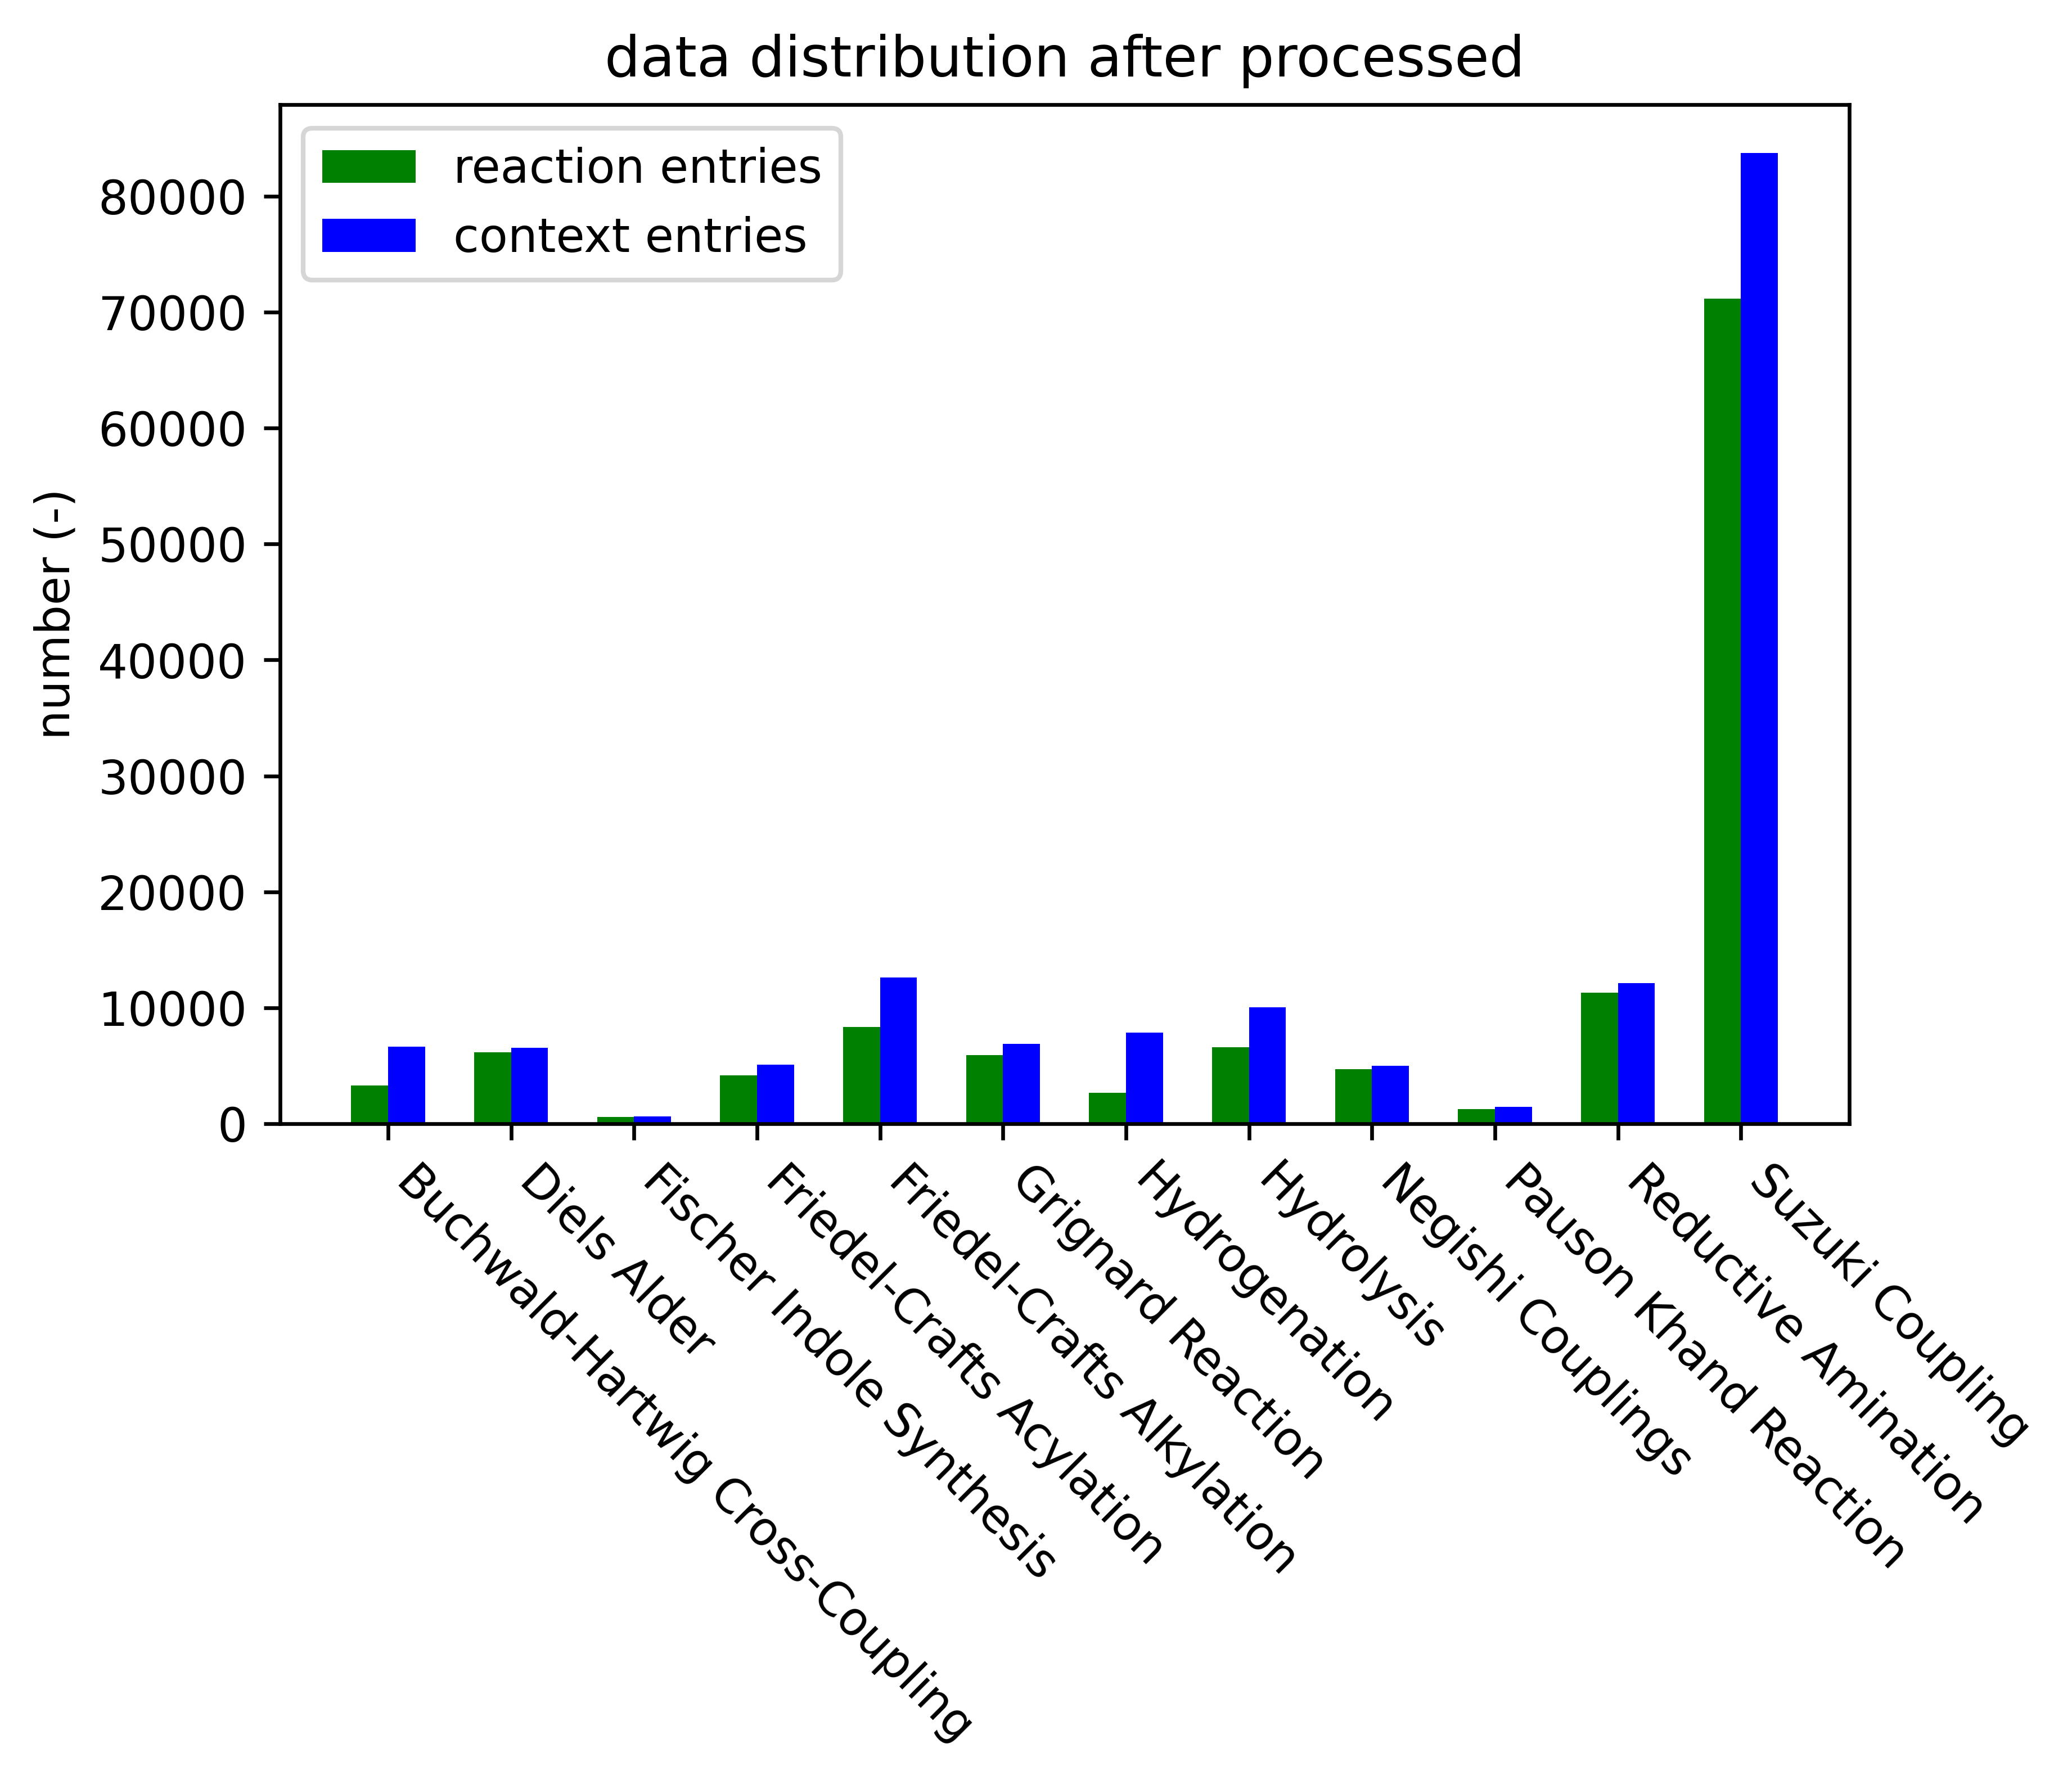

In [6]:
# Get the data distribution after all the data preprocessing
records_processed = {name: [0,0] for name in dir_names}
pre_reaxys_id = ''

for reaxys_id in tqdm(list(zip(*all_data))[0]):
    try:
        key = Reaction_ID_search[reaxys_id]
    except:
        #print(reaxys_id)
        continue
    #for key, value in raw_datas.items():
        #if reaxys_id in list(value['Reaction ID']):f
    records_processed[key][1] += 1
    if reaxys_id != pre_reaxys_id: records_processed[key][0] += 1
    pre_reaxys_id = reaxys_id

        
print(records_processed)
reaction_entries = 0
condition_entries = 0
for key, value in records_processed.items():
    reaction_entries += value[0]
    condition_entries += value[1]

print('After data preprocessed:')
print('Number of reaction entries: {}'.format(reaction_entries))
print('Number of condtion entries: {}'.format(condition_entries))

data_distribution(records_processed, 'data distribution after processed')

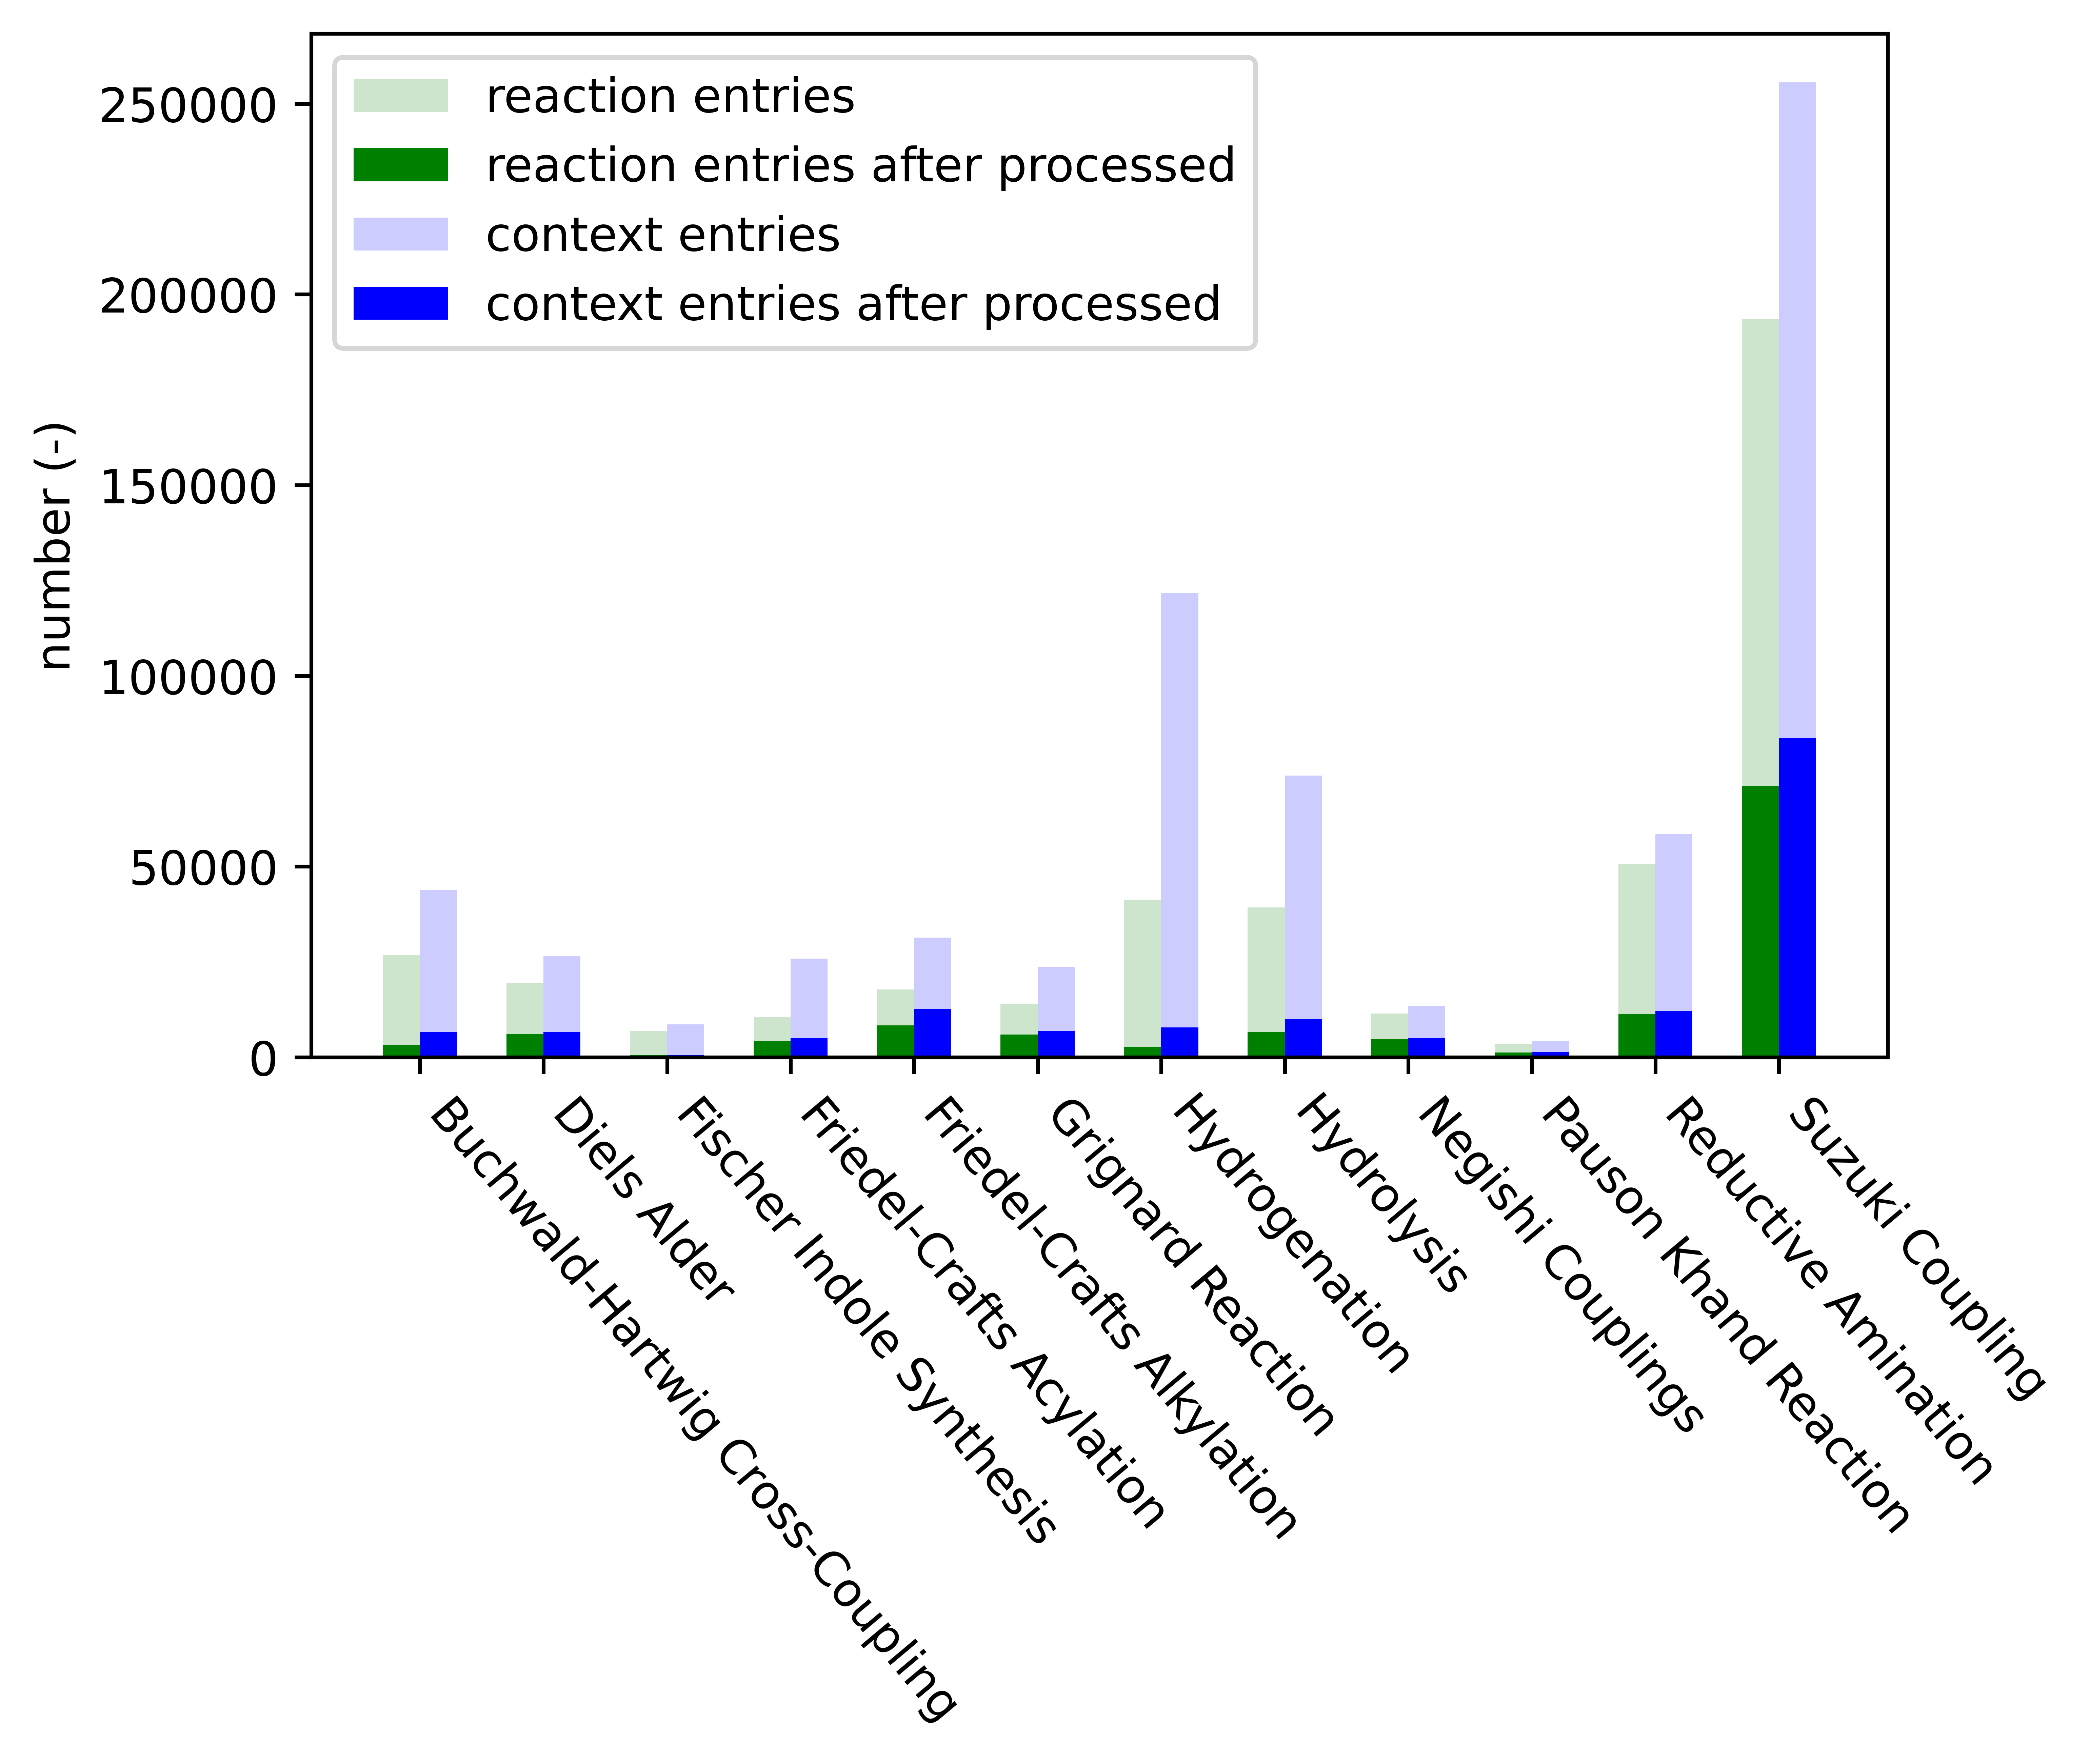

In [7]:
# print the joint distribution of data before and after data-preprocess
def joint_data_distribution(records, records_processed, title = ''):
    reaction_names, entries = list(zip(*sorted(records.items())))
    reaction_entry, context_entry = list(zip(*entries))
    
    reaction_names, entries_processed = list(zip(*sorted(records_processed.items())))
    reaction_entry_processed, context_entry_processed = list(zip(*entries_processed))
    
    x = np.arange(len(reaction_names))
    width = 0.3
    plt.figure(dpi = 1000)
    plt.bar(x, reaction_entry, width, color='green', label='reaction entries', alpha =0.2)
    plt.bar(x, reaction_entry_processed, width, color='green', label='reaction entries after processed', alpha =1)
    
    plt.bar(x + width, context_entry, width, color='blue', label='context entries', alpha =0.2)
    plt.bar(x + width, context_entry_processed, width, color='blue', label='context entries after processed', alpha =1)                                         
                                             
    plt.xticks(x + width / 2 , reaction_names, rotation=-50, ha='left')
    plt.ylabel('number (-)')
    plt.title(title)
    plt.legend(bbox_to_anchor=(0,1), loc='upper left')
    plt.show()
                                             
joint_data_distribution(records, records_processed)

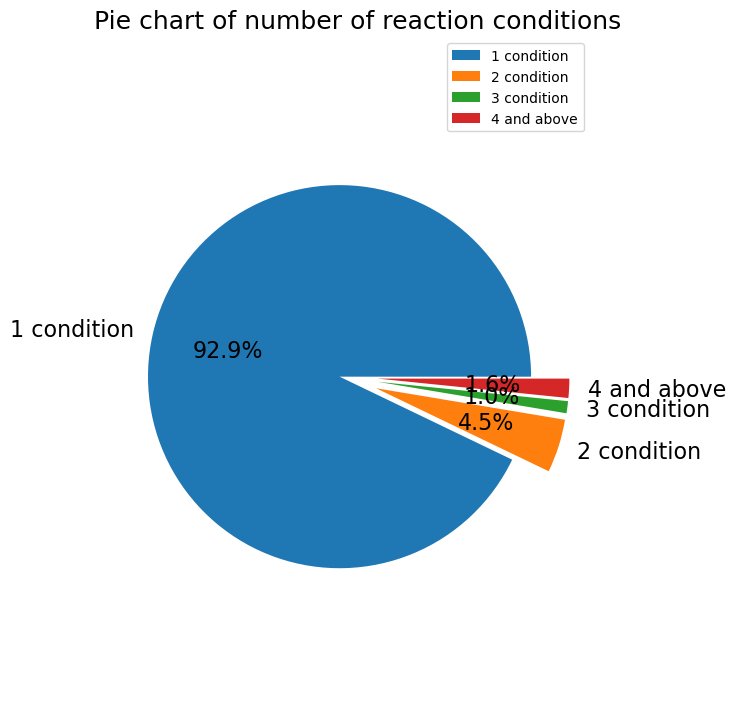

In [8]:
# Check the multiple reaction context entries
def sort_out_data(data):
    sorted_data = []
    rxn_id = ''
    j = -1
    for i in range(len(data)):
        if rxn_id != data[i][0]:
            j += 1
            sorted_data.append([data[i][0], data[i][1], data[i][2], []])
            y_ = data[i][3]; r_ = remove_duplicated_records(data[i][4]);
            s_ = remove_duplicated_records(data[i][5]); t_ = data[i][6];
            sorted_data[j][3].append((y_, r_, s_, t_))
            rxn_id = data[i][0]
        else:
            if (r_ == remove_duplicated_records(data[i][4])) & (s_ == remove_duplicated_records(data[i][5])):
                pass
            else:
                y_ = data[i][3]; r_ = remove_duplicated_records(data[i][4]);
                s_ = remove_duplicated_records(data[i][5]); t_ = data[i][6];
                sorted_data[j][3].append((y_, r_, s_, t_))
    return sorted_data

def remove_duplicated_records(records):
    return '; '.join(list(dict.fromkeys(records.split('; '))))

def cum_sum_dict(results, start):
    record = dict()
    above = 0
    for key, value in results.items():
        if key < start:
            record[str(key)+' condition'] = value
        else:
            above += value
    record[str(start)+' and above'] = above
    return record


data_sorted = sort_out_data(all_data)
conditions = []
for i, rxn in enumerate(data_sorted):
    context = rxn[3]
    conditions.append(len(context))
results = Counter(conditions)
pie_data = cum_sum_dict(results, 4)

plt.figure(figsize=(6,9), dpi =100)    # 顯示圖框架大小
labels, size = list(zip(*sorted(pie_data.items())))      # 製作圓餅圖的類別標籤
separeted = (0, 0.2, 0.2, 0.2)                  # 依據類別數量，分別設定要突出的區塊
# size = accident["count"]                         # 製作圓餅圖的數值來源

plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
        explode = separeted,            # 設定分隔的區塊位置
        pctdistance = 0.6,              # 數字距圓心的距離
        textprops = {"fontsize" : 16},  # 文字大小
        shadow=False)                    # 設定陰影

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("Pie chart of number of reaction conditions", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")

Text(0, 0.5, 'number')

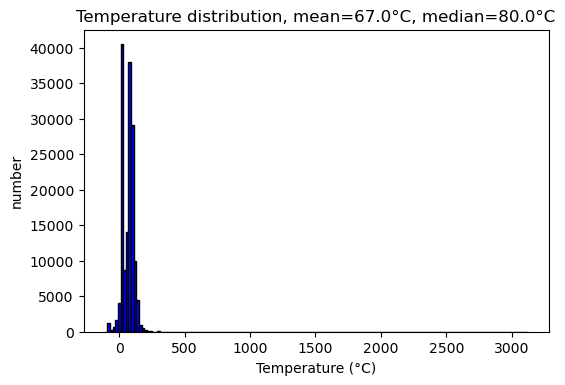

In [9]:
# Temperature histogram 1
plt.figure(dpi=100)
plt.hist(temperatures, color = 'blue', edgecolor = 'black',
         bins = int((max(temperatures) - min(temperatures))//20))
plt.title('Temperature distribution, mean={:.1f}\u00b0C, median={:.1f}\u00b0C'.format(
    np.mean(temperatures), np.median(temperatures)))
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('number')


Temperature distribution, mean=67.0°C, median=80.0°C


Text(0, 0.5, 'number')

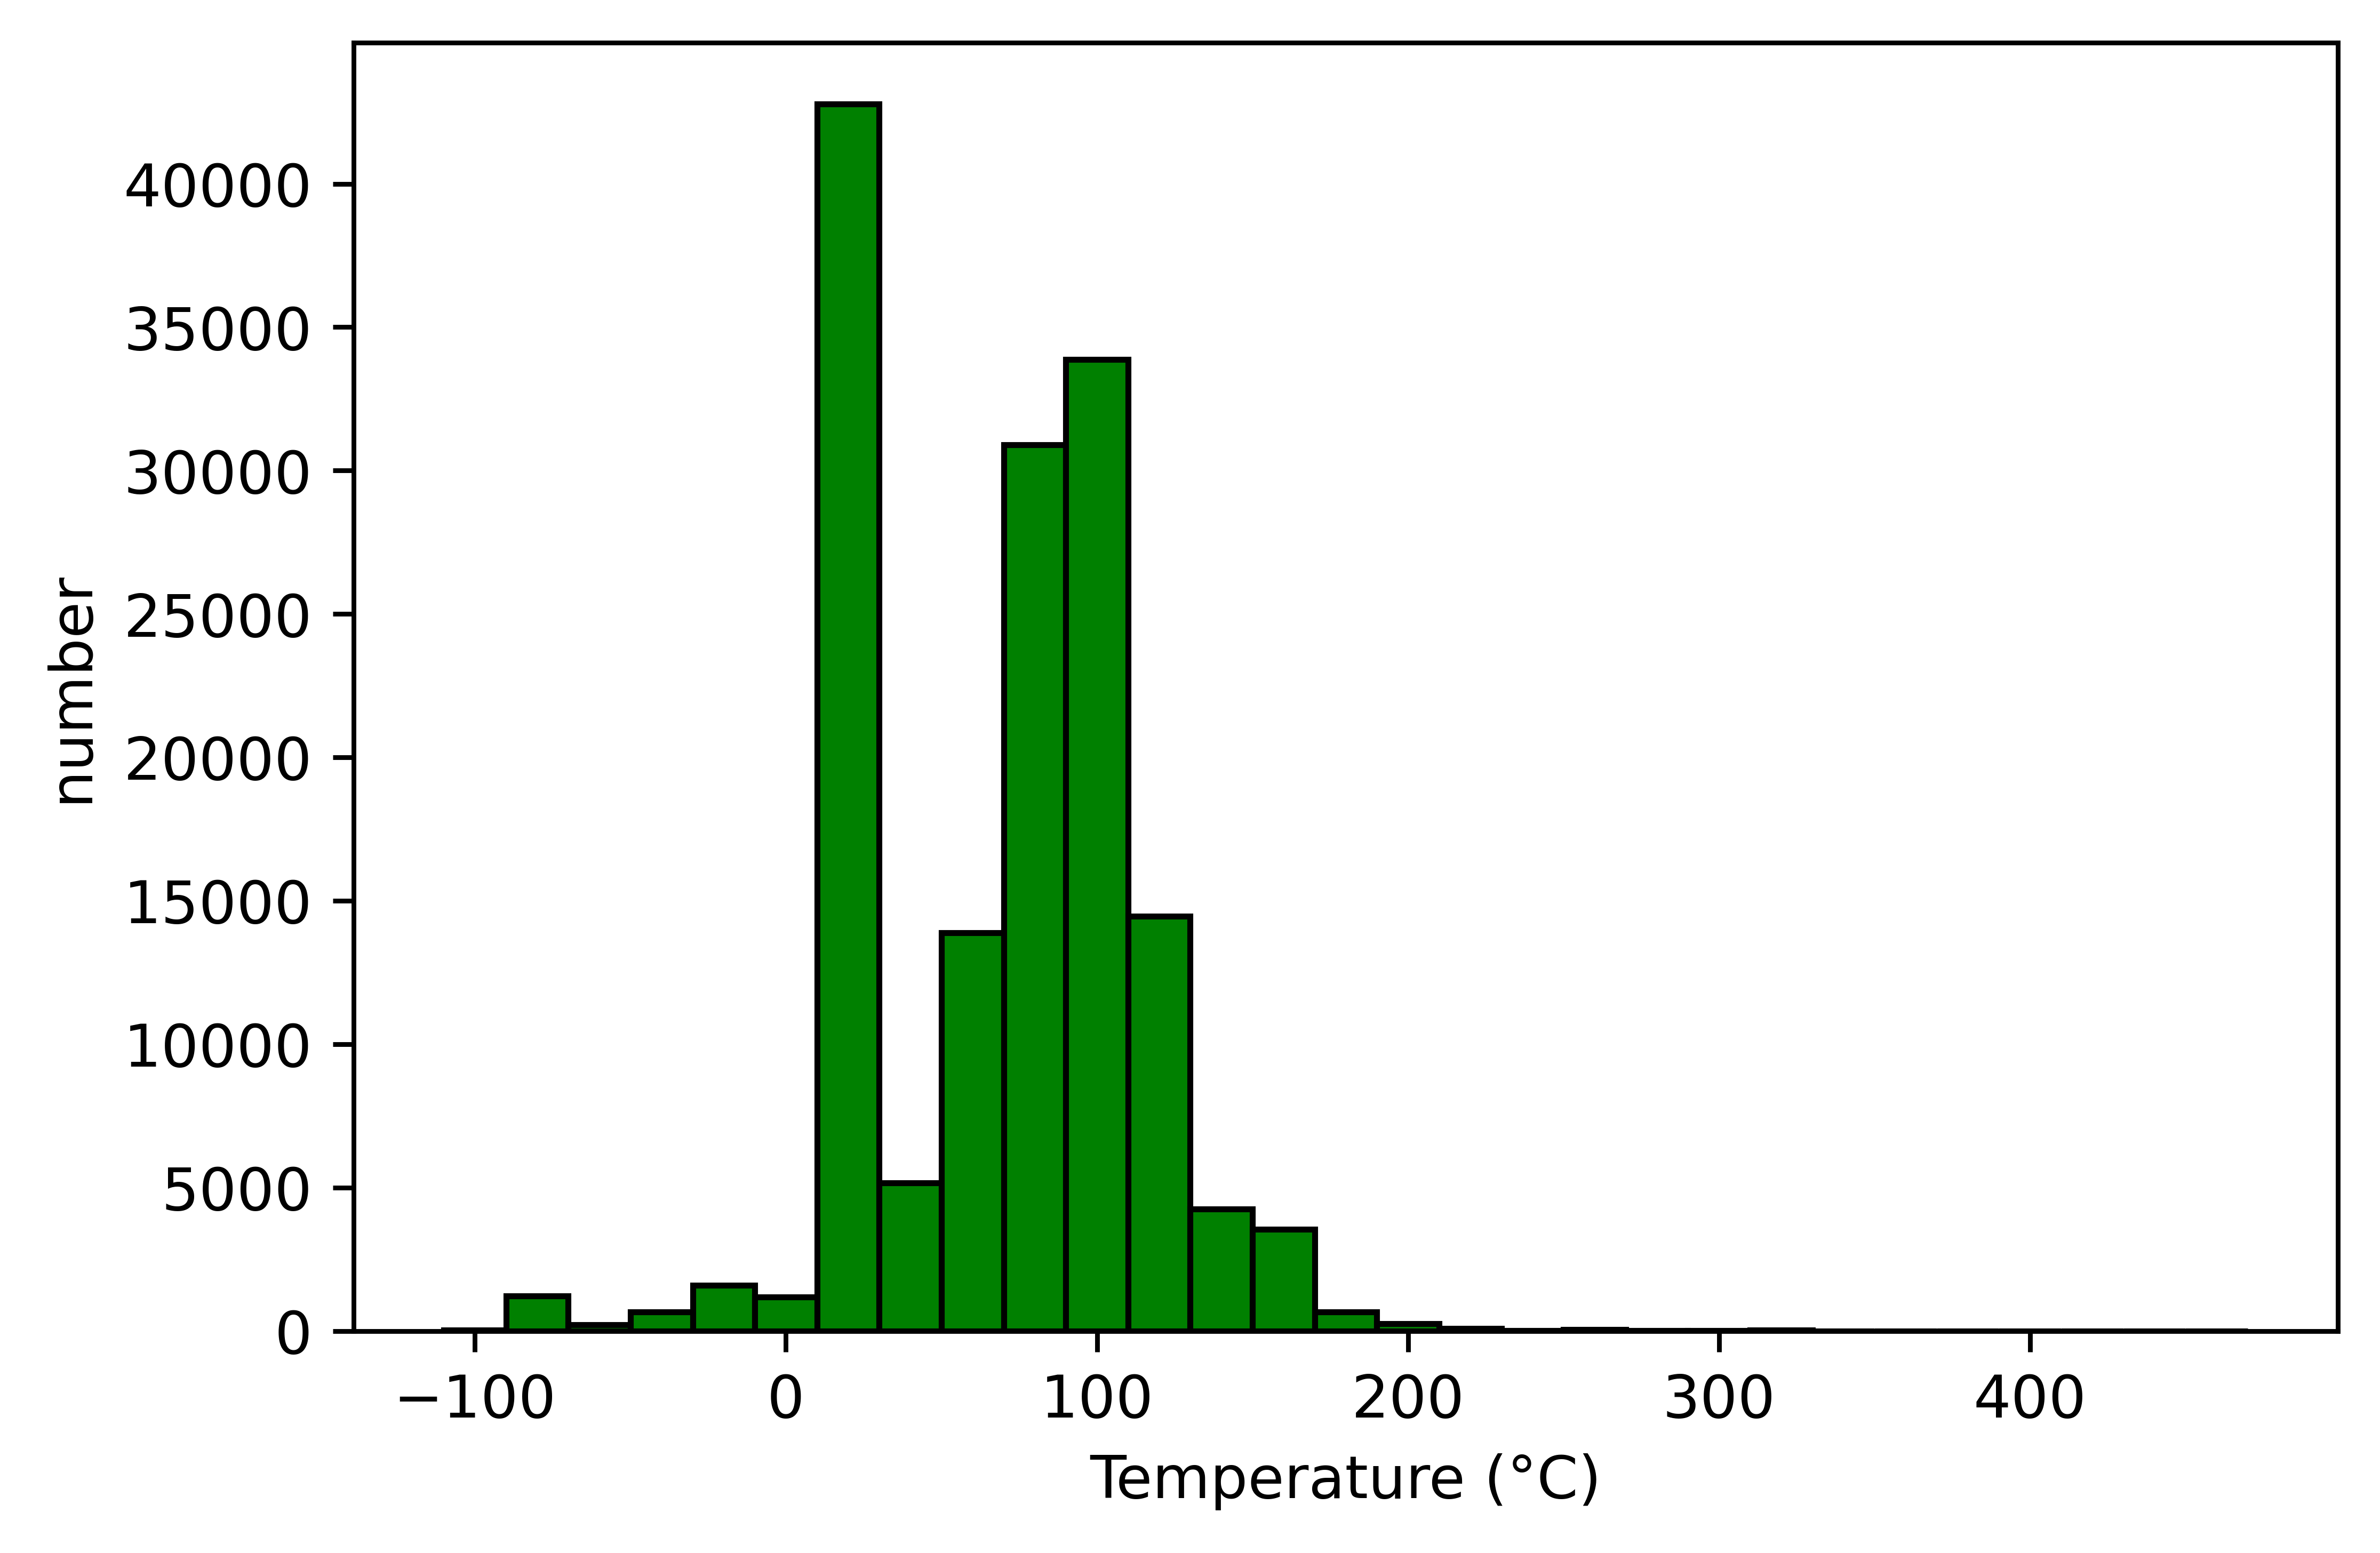

In [10]:
# Temperature histogram 2 (excludue temperature > 300)
temperatures_2 = [float(t)  for t in temperatures if float(t) <=501.]
plt.figure(dpi=800)
plt.hist(temperatures_2, color = 'green', edgecolor = 'black',
         bins = int((max(temperatures_2) - min(temperatures_2))//20))

print('Temperature distribution, mean={:.1f}\u00b0C, median={:.1f}\u00b0C'.format(
    np.mean(temperatures), np.median(temperatures)))
plt.xlabel('Temperature (\u00b0C)')
plt.ylabel('number')

In [12]:
# Calcluate the accuracy of tempreature basline:
# Use the mean and median of training data as baslines, and then evaluate the performance on testing data
def accuracy_within_range(temp_diffs, span):
    acc = [1 if (np.abs(t) <= span) else 0 for t in temp_diffs ]
    return sum(acc)/len(acc)

mean_temp = np.mean(temperatures[:len(train_data)])
median_temp = np.median(temperatures[:len(train_data)])
mean_diffs = [(t - mean_temp) for t in temperatures[len(train_data)+len(validate_data):]]
median_diffs = [(t - median_temp) for t in temperatures[len(train_data)+len(validate_data):]]
span1 = 10
span2 = 20

print('Mean temperature ({:.1f}\u00b0C) baseline:'.format(mean_temp))
print('RMSE of mean temperature: {:.1f}'.format(np.sqrt(np.average(np.square(mean_diffs)))))
print('MAE of mean temperature: {:.1f}'.format(np.average(np.abs(mean_diffs))))
print('Mean temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span1, 100*accuracy_within_range(mean_diffs, span1))) 
print('Mean temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span2, 100*accuracy_within_range(mean_diffs, span2)))

print('-'*50)
print('Median temperature ({:.1f}\u00b0C) baseline:'.format(median_temp))
print('RMSE of median temperature: {:.1f}'.format(np.sqrt(np.average(np.square(median_diffs)))))
print('MAE of median temperature: {:.1f}'.format(np.average(np.abs(median_diffs))))
print('Median temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span1, 100*accuracy_within_range(median_diffs, span1))) 
print('Median temperature predictions fall within +-{}\u00b0C accuracy: {:.1f}%'.format(
    span2, 100*accuracy_within_range(median_diffs, span2)))
    

Mean temperature (66.9°C) baseline:
RMSE of mean temperature: 43.9
MAE of mean temperature: 36.4
Mean temperature predictions fall within +-10°C accuracy: 9.7%
Mean temperature predictions fall within +-20°C accuracy: 28.6%
--------------------------------------------------
Median temperature (80.0°C) baseline:
RMSE of median temperature: 45.6
MAE of median temperature: 35.1
Median temperature predictions fall within +-10°C accuracy: 26.9%
Median temperature predictions fall within +-20°C accuracy: 46.8%


Text(0, 0.5, 'number')

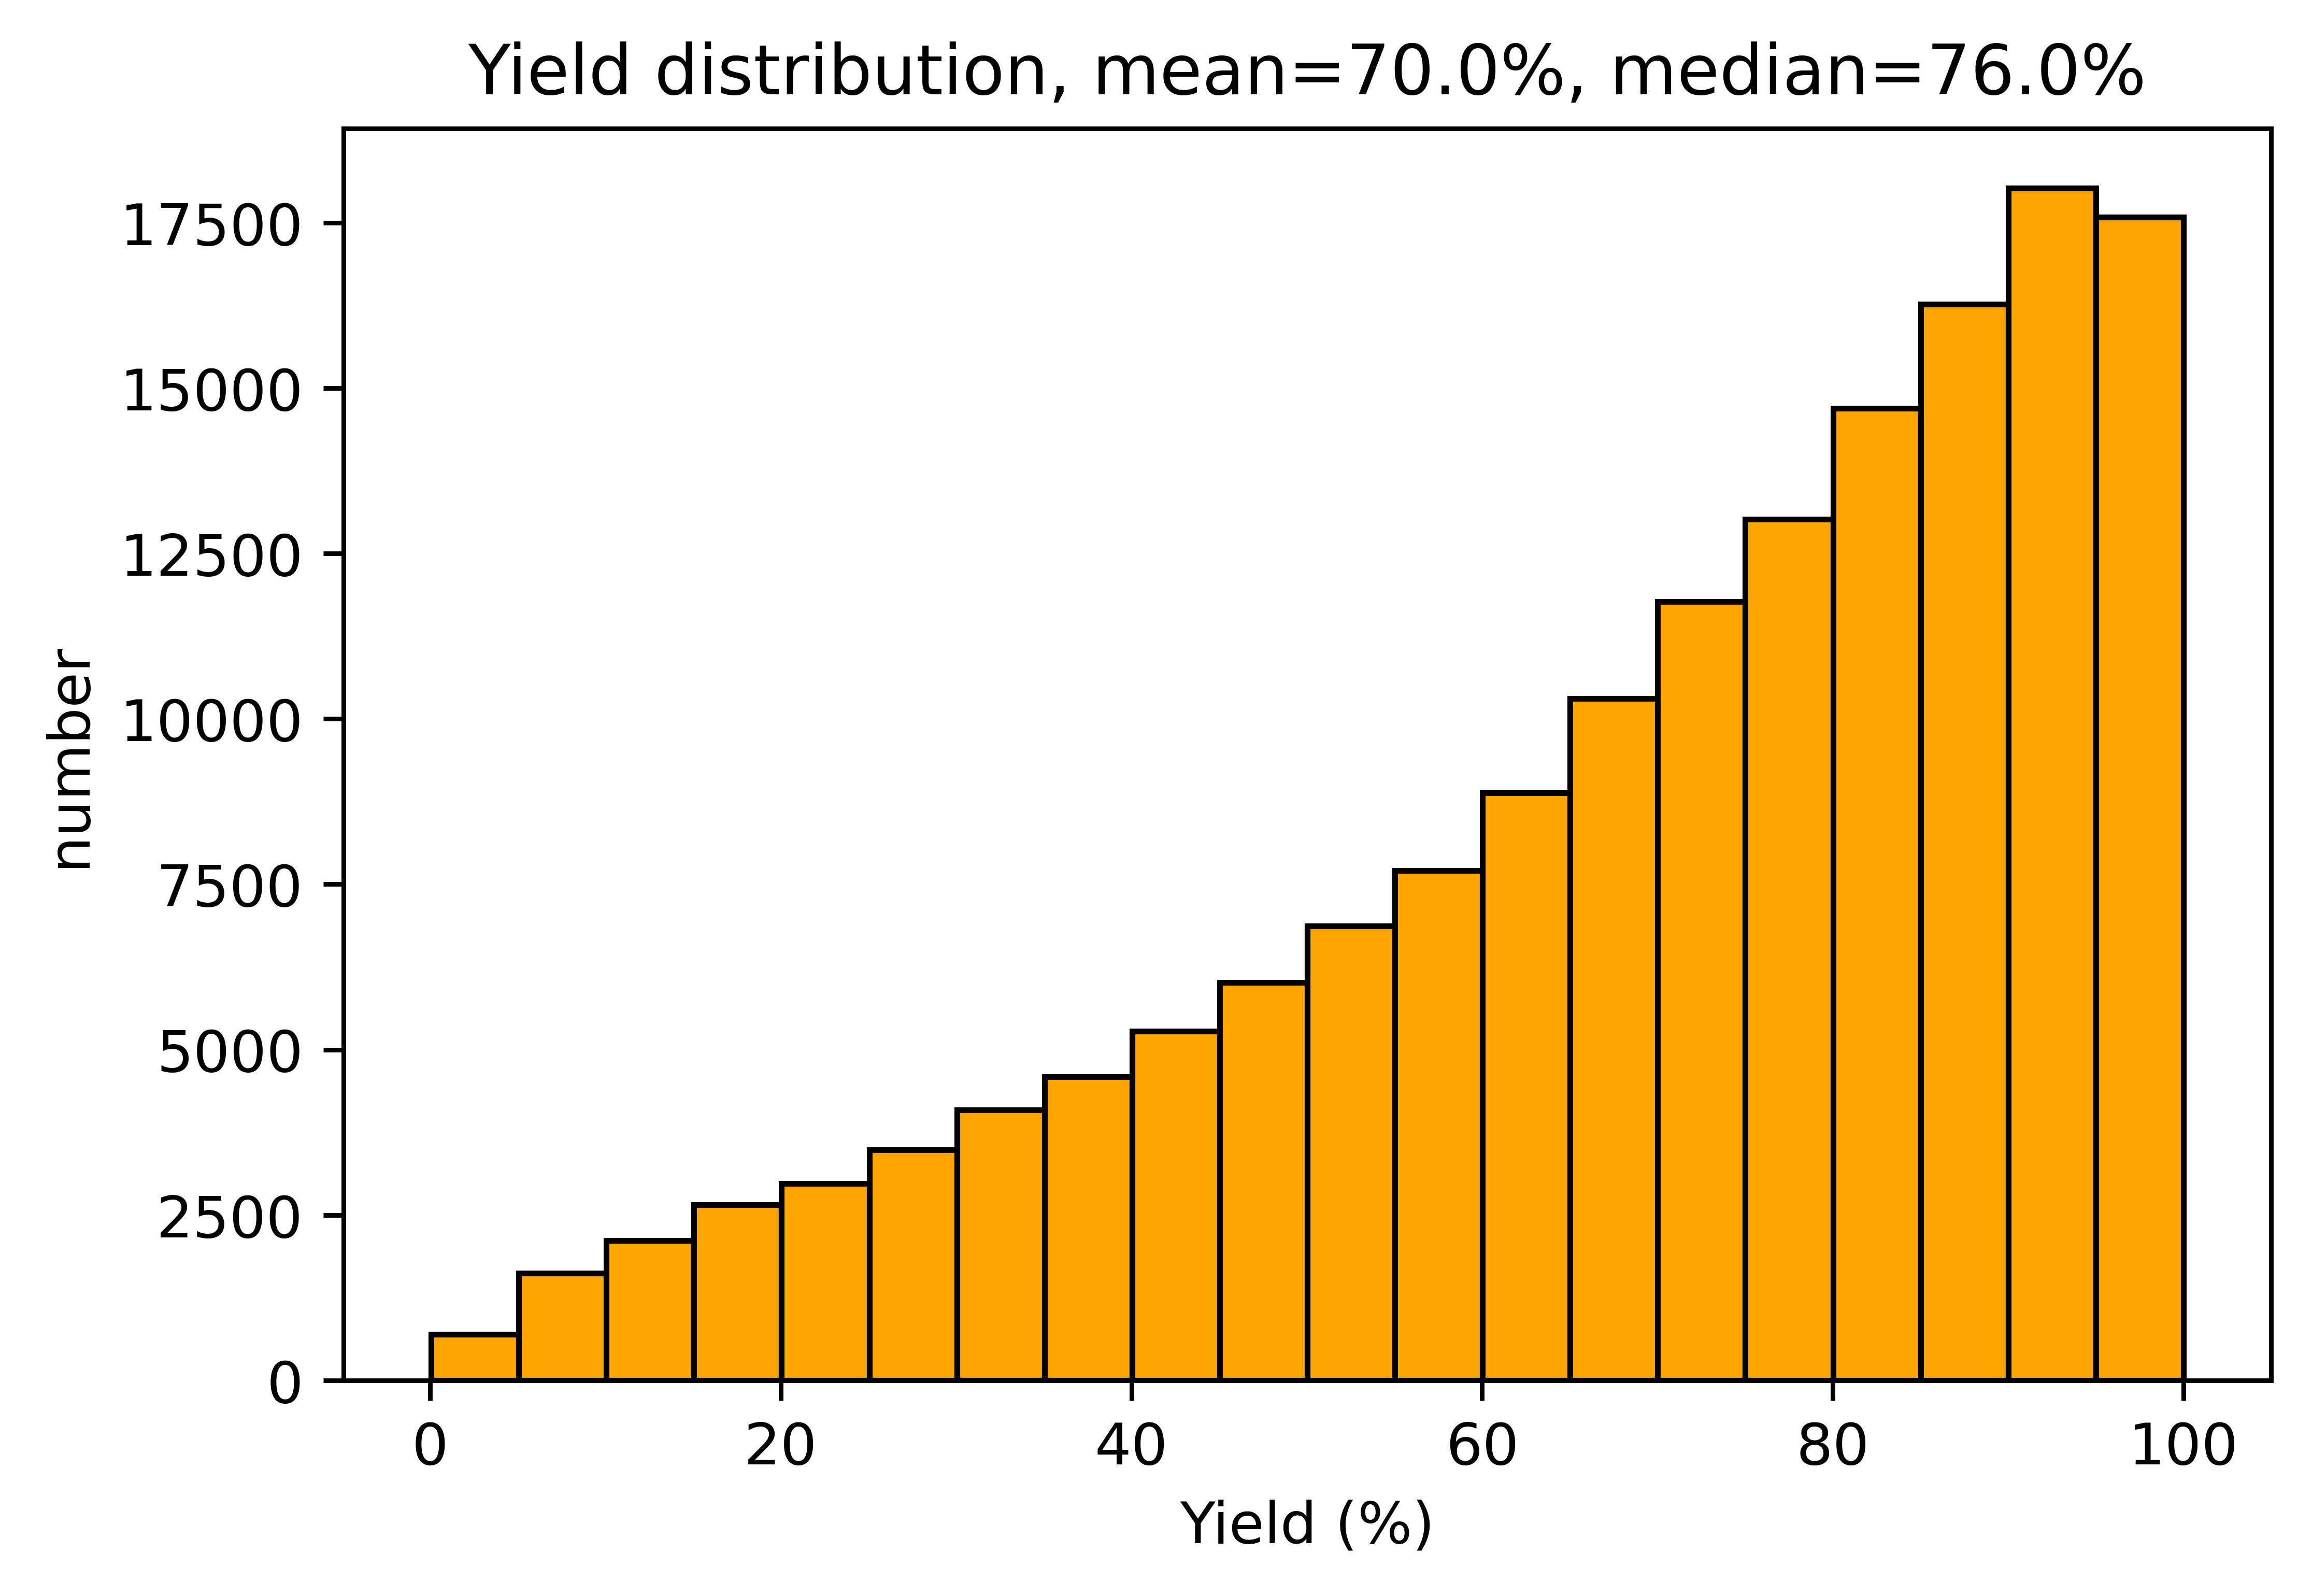

In [23]:
# Yield histogram
plt.figure(dpi=800)
plt.hist(yields, color = 'orange', edgecolor = 'black',
         bins = 20)

plt.title('Yield distribution, mean={:.1f}%, median={:.1f}%'.format(
    np.mean(yields), np.median(yields)))
plt.xlabel('Yield (%)')
plt.ylabel('number')

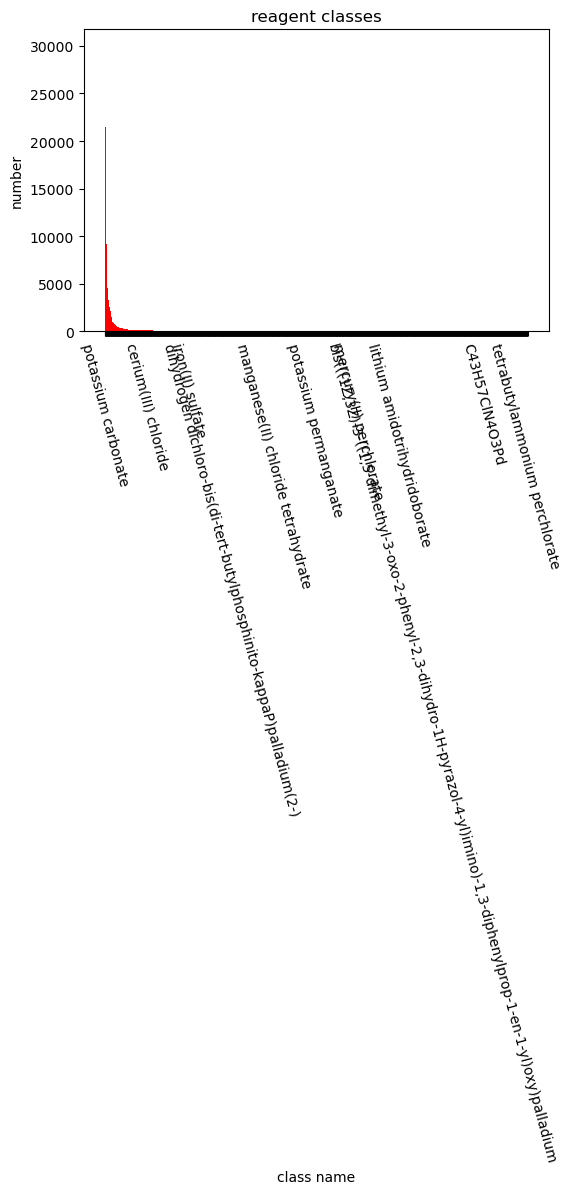

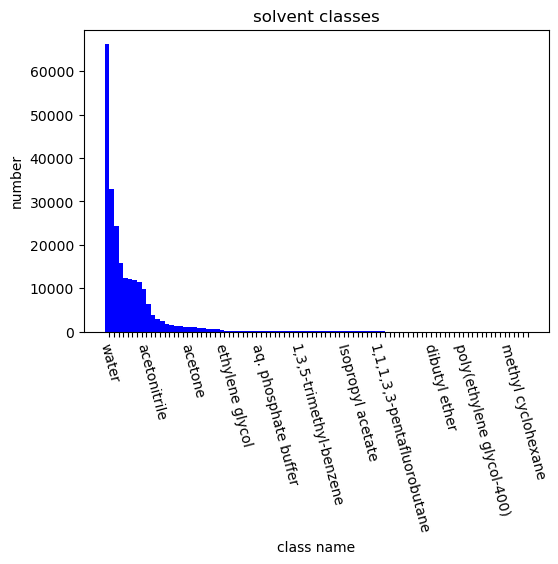

In [16]:
# Visualize reagent and solvent classes distribution
def plot_classes(classes_list, title = '', color = 'r'):
    names, counts = zip(*classes_list)
    show = len(names)//10
    names = [n if ((i+1)%show == 1) else '' for i, n in enumerate(names) ]
    pos = np.arange(len(names))
    width = 1.0
    plt.figure(dpi=100)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(names, rotation=-75)
    plt.ylabel('number')
    plt.xlabel('class name')
    plt.title(title)
    plt.bar(pos, counts, width, color=color)
    plt.show()

reag_list = []; solv_list = [];
for reagent, solvent in zip(reagents, solvents):
    reag_list += reagent.split('; ')
    solv_list += solvent.split('; ')
reag_list = list(Counter(reag_list).items())
reag_list = sorted(reag_list, key=lambda x:x[1], reverse=True)
solv_list = list(Counter(solv_list).items())
solv_list = sorted(solv_list, key=lambda x:x[1], reverse=True)

plot_classes(reag_list, title = 'reagent classes', color = 'r')
plot_classes(solv_list, title = 'solvent classes', color = 'b')

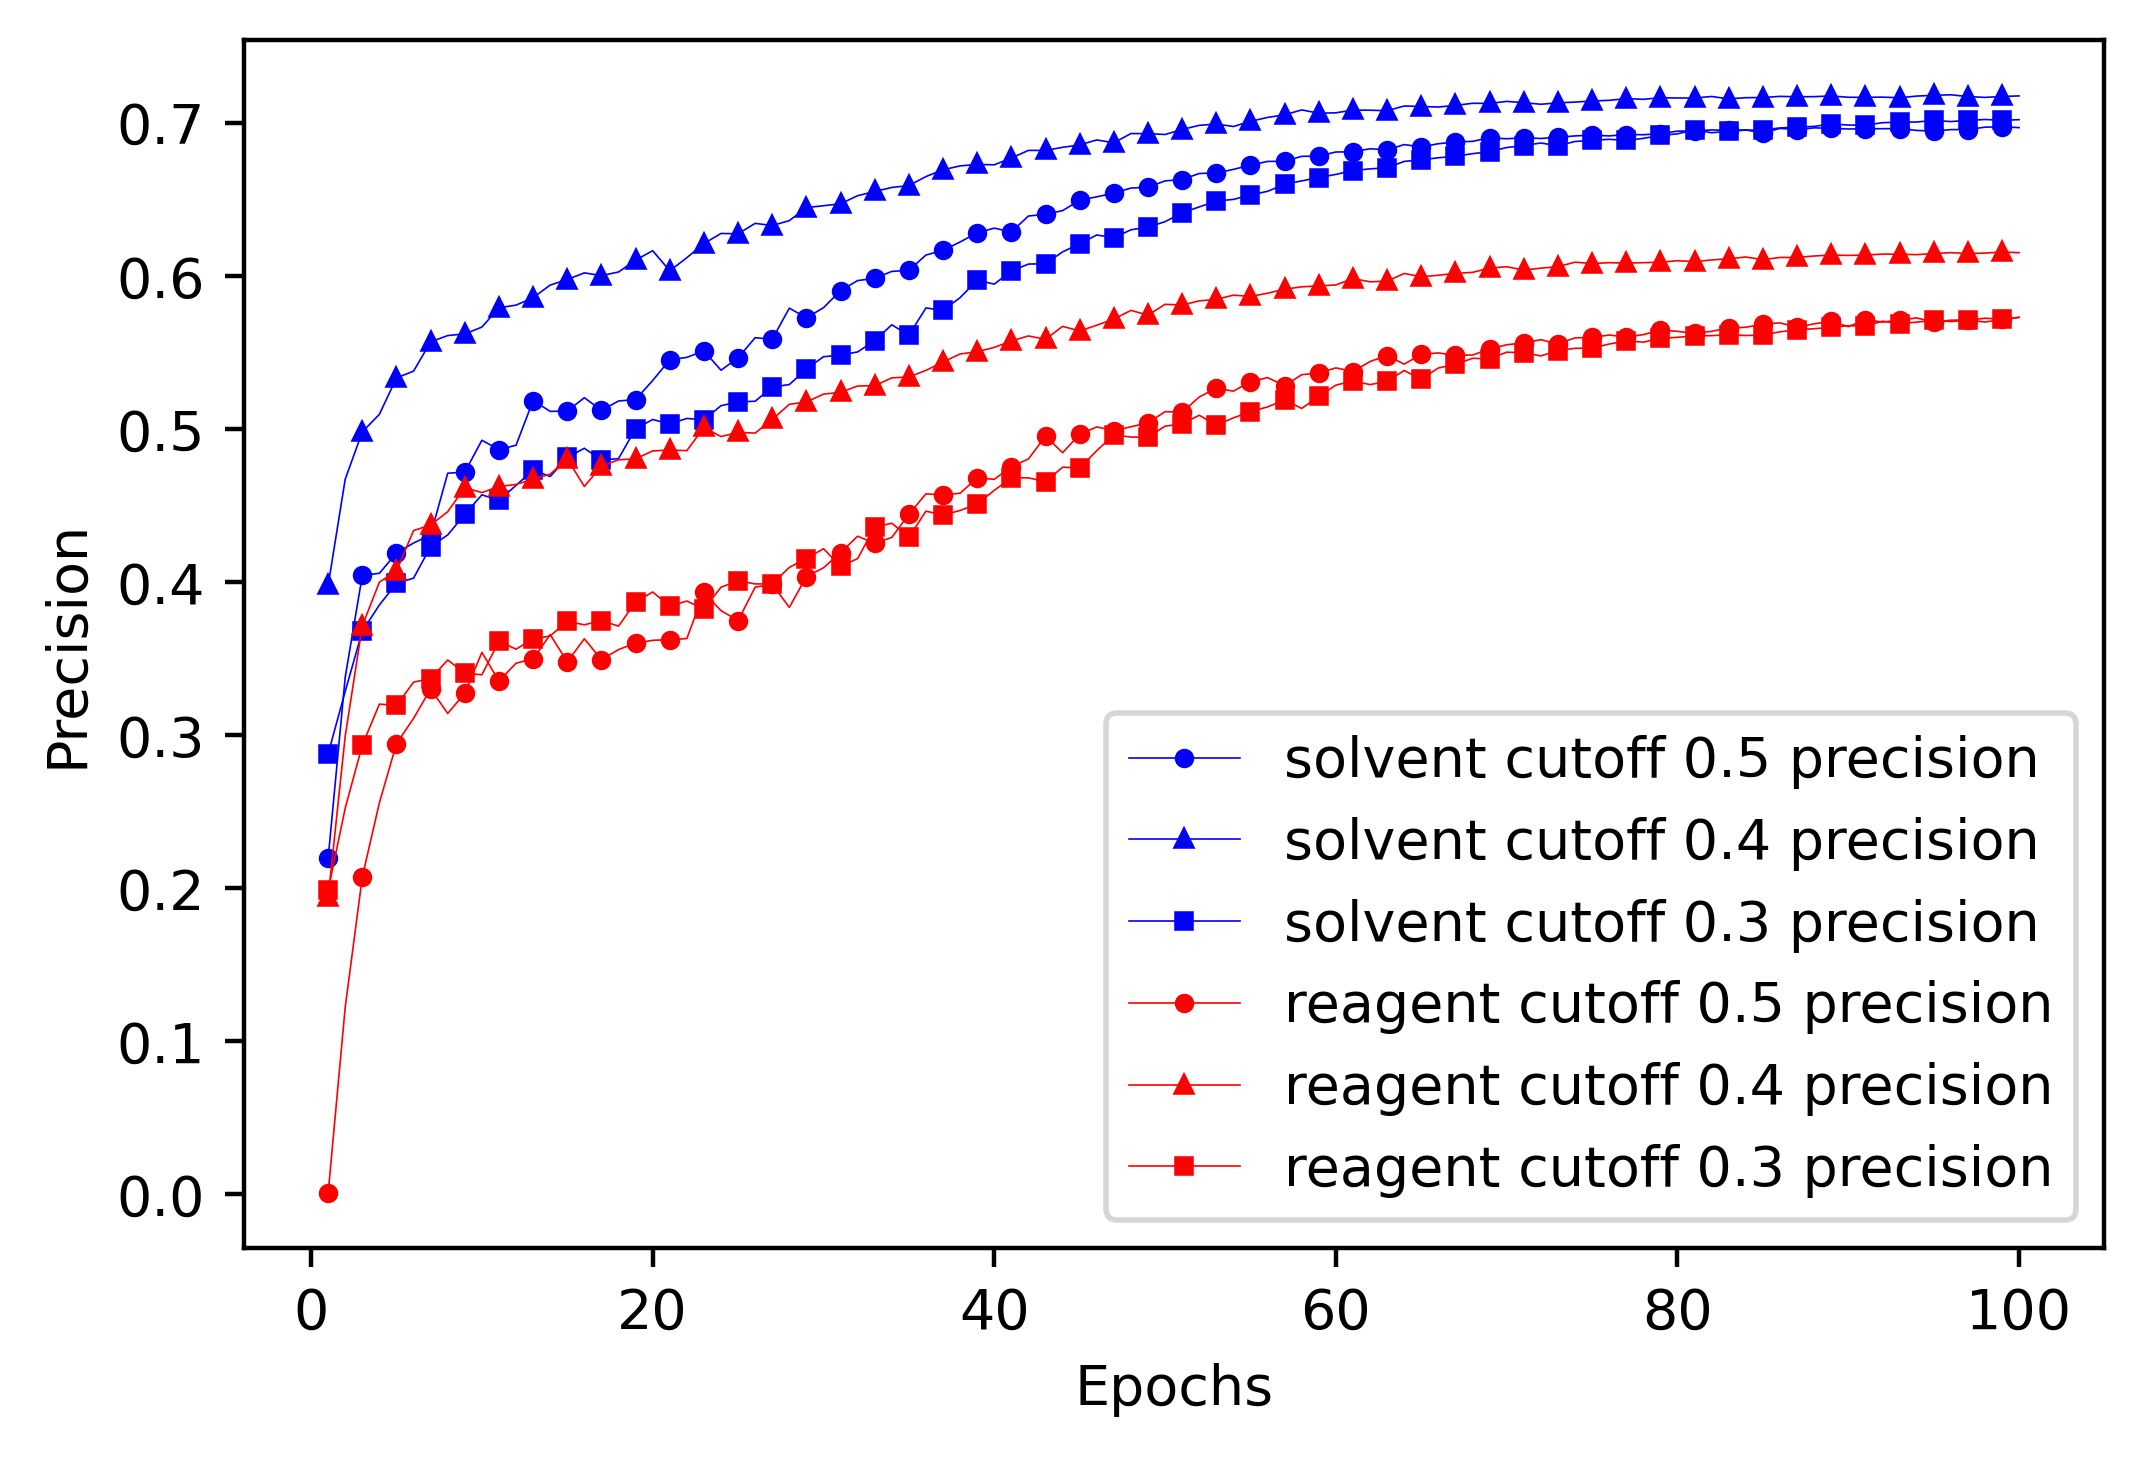

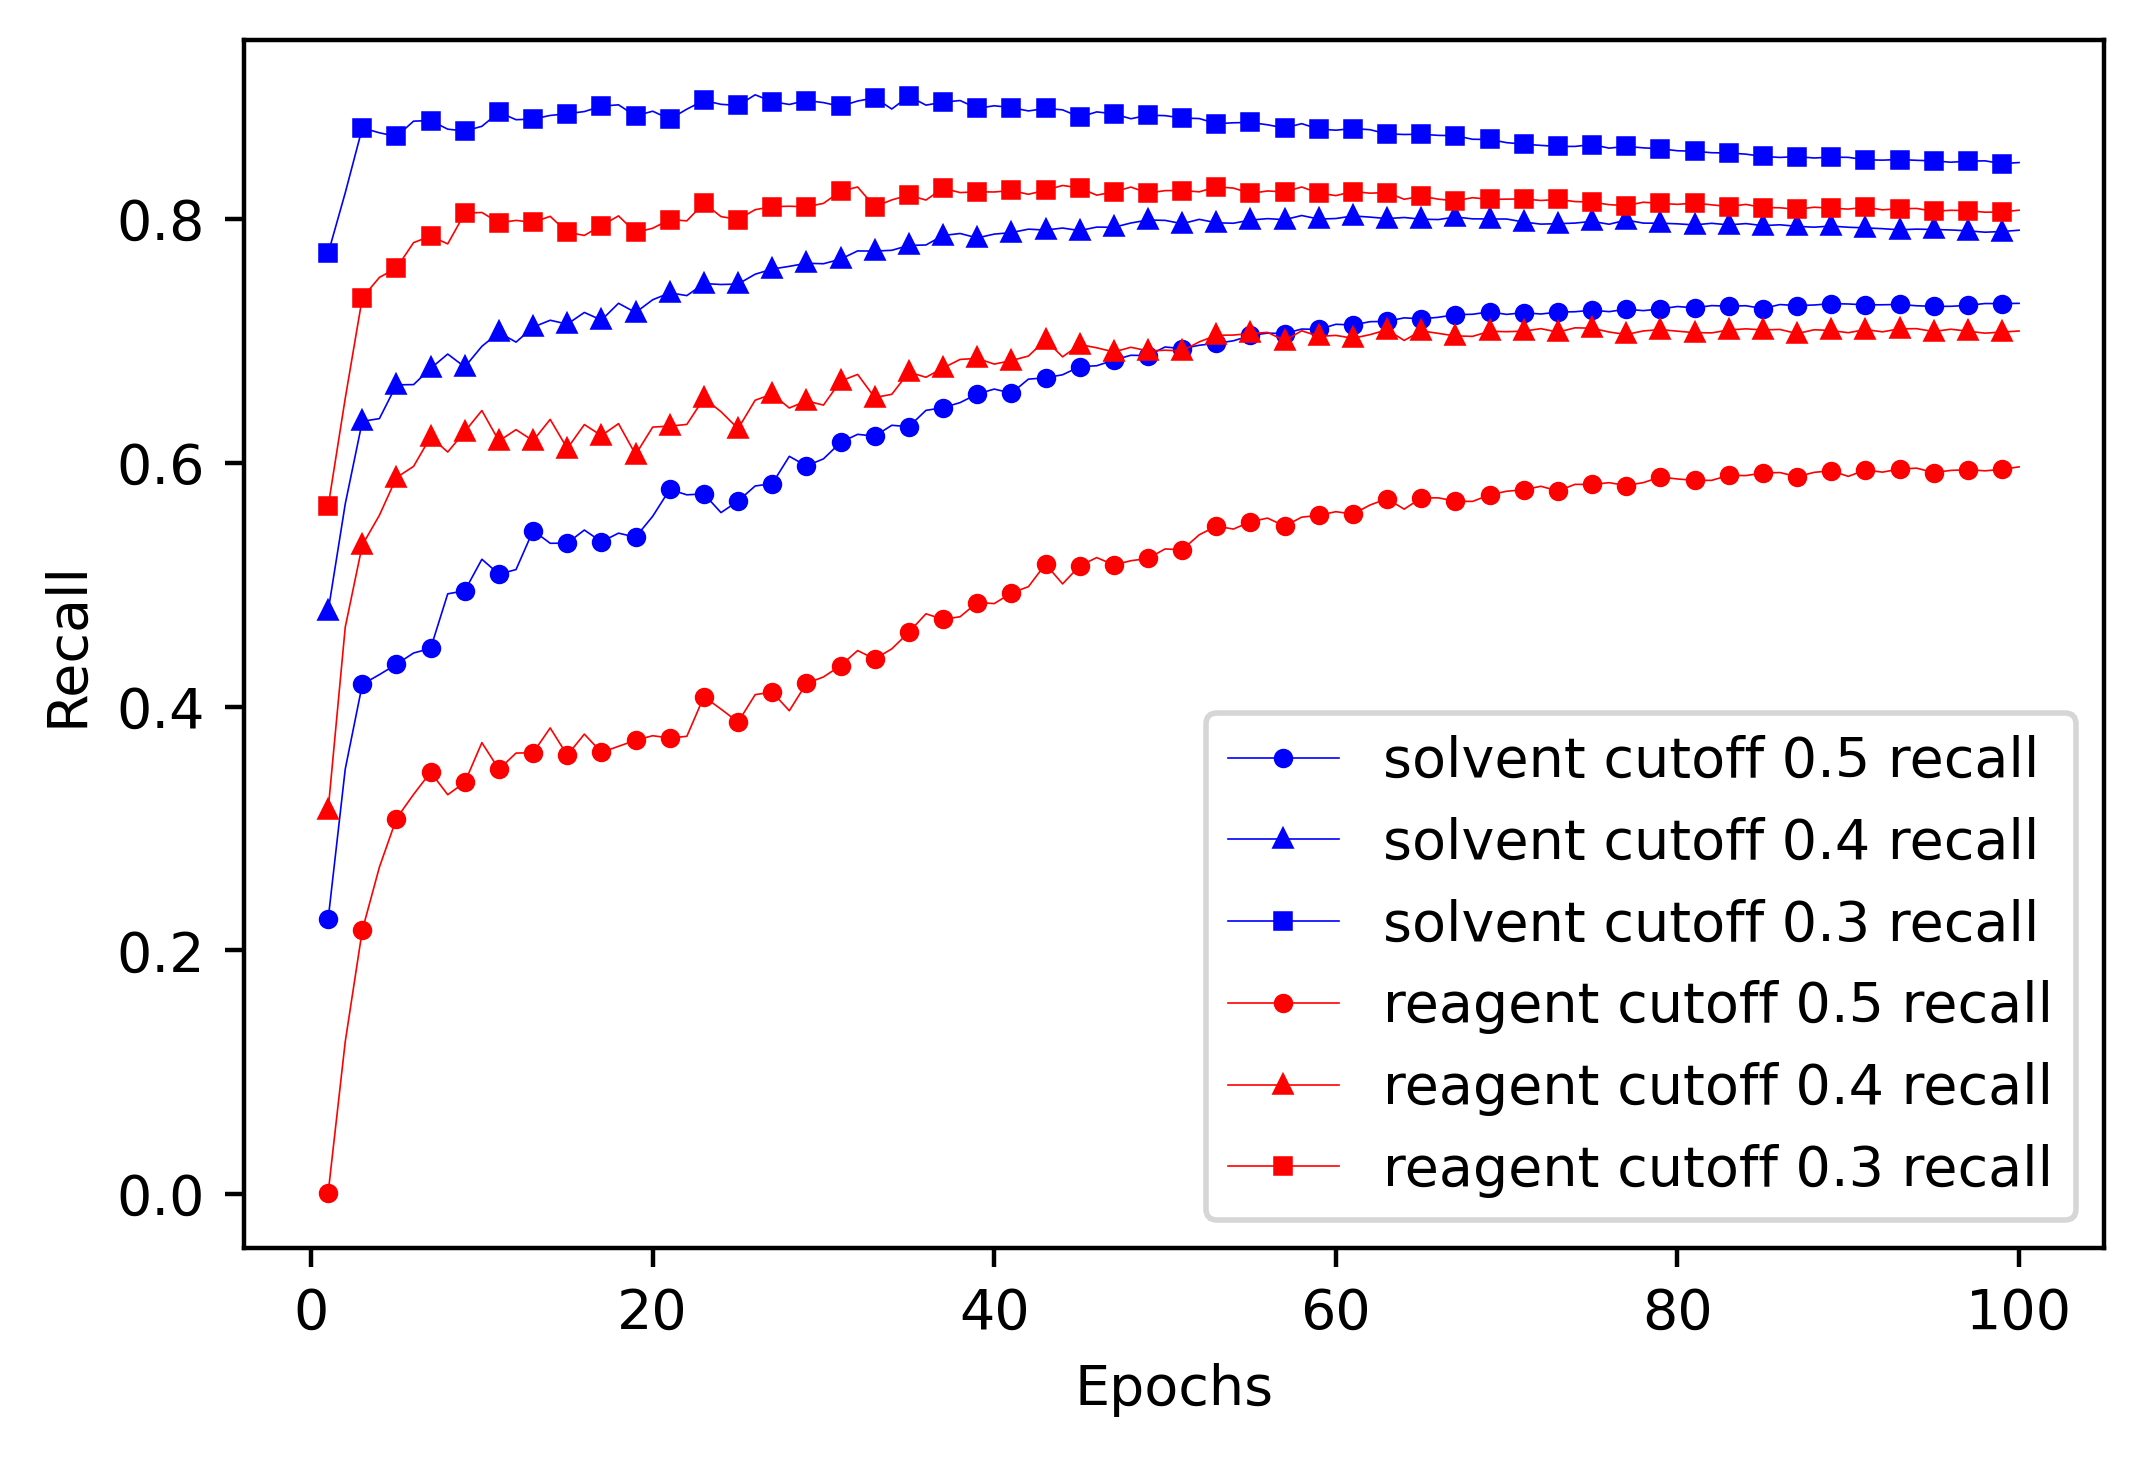

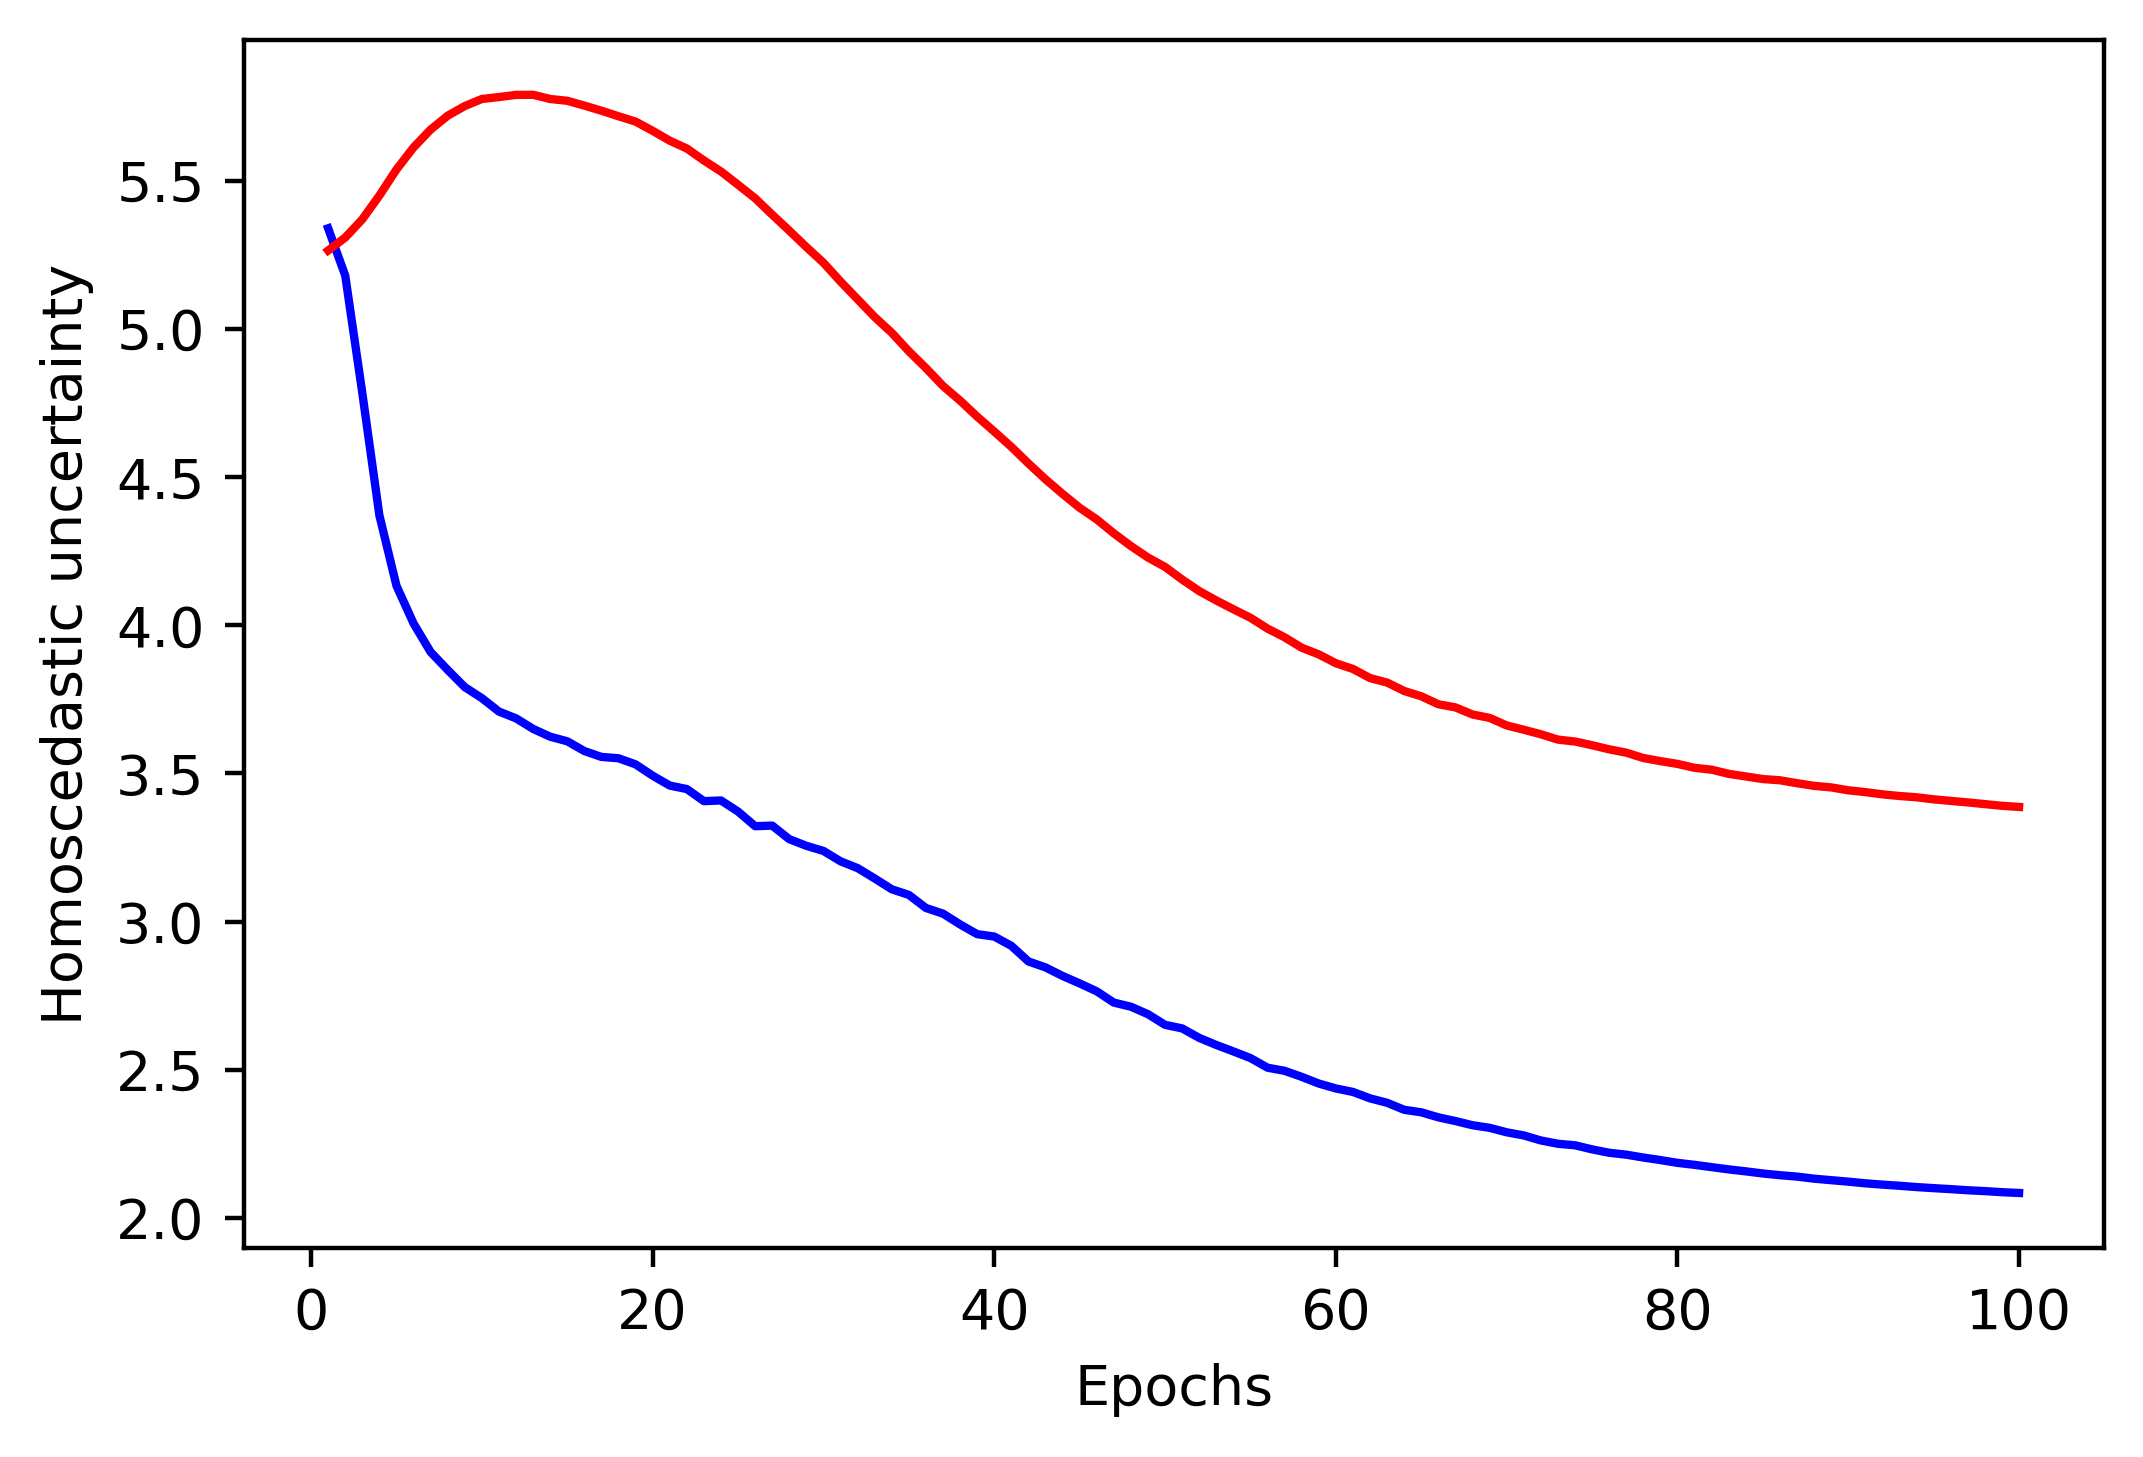

In [2]:
# post-analyze the first model training process

def plot_summary_first(epoch_dict, labels, line_style, ylabel, log_scale = False, legend = True):
    plt.figure(dpi=400)
    for label, style in zip(labels, line_style):
        keys = []
        sub_values = []
        for key, value in epoch_dict.items():
            keys.append(key)
            sub_values.append(epoch_dict[key][label])
        if style[1]:
            plt.plot(keys, sub_values, label=label, 
                     color = style[0], marker = style[1], markersize = 2.5, linewidth = 0.3, markevery=2)
        else:
            plt.plot(keys, sub_values, label=label, color = style[0])
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    if log_scale:
        plt.yscale('log')
    if legend:
        plt.legend()

log_path = os.path.join(target_dir, 'log_train_first.txt')
f = open(log_path, 'r')
train_log = f.readlines()
f.close()
epoch_dict = dict()
for i, line in enumerate(train_log):
    if 'epoch: ' in line:
        number = int(line.strip('\n').split(': ')[-1])
        epoch_dict[number] = dict()
        epoch_dict[number]['solvent cutoff 0.5 precision'] = float(train_log[i+3].split(' ')[5].strip(','))
        epoch_dict[number]['solvent cutoff 0.4 precision'] = float(train_log[i+4].split(' ')[5].strip(','))
        epoch_dict[number]['solvent cutoff 0.3 precision'] = float(train_log[i+5].split(' ')[5].strip(','))
        
        epoch_dict[number]['reagent cutoff 0.5 precision'] = float(train_log[i+10].split(' ')[5].strip(','))
        epoch_dict[number]['reagent cutoff 0.4 precision'] = float(train_log[i+11].split(' ')[5].strip(','))
        epoch_dict[number]['reagent cutoff 0.3 precision'] = float(train_log[i+12].split(' ')[5].strip(','))

        epoch_dict[number]['solvent cutoff 0.5 recall'] = float(train_log[i+3].split(' ')[8].strip(','))
        epoch_dict[number]['solvent cutoff 0.4 recall'] = float(train_log[i+4].split(' ')[8].strip(','))
        epoch_dict[number]['solvent cutoff 0.3 recall'] = float(train_log[i+5].split(' ')[8].strip(','))
        
        epoch_dict[number]['reagent cutoff 0.5 recall'] = float(train_log[i+10].split(' ')[8].strip(','))
        epoch_dict[number]['reagent cutoff 0.4 recall'] = float(train_log[i+11].split(' ')[8].strip(','))
        epoch_dict[number]['reagent cutoff 0.3 recall'] = float(train_log[i+12].split(' ')[8].strip(','))        
        
        epoch_dict[number]['variance of uncertainty of solvent task'] = np.exp(float(train_log[i+16].split(' ')[-1]))
        epoch_dict[number]['variance of uncertainty of reagent task'] = np.exp(float(train_log[i+17].split(' ')[-1]))
        
plot_summary_first(epoch_dict, labels = ['solvent cutoff 0.5 precision', 'solvent cutoff 0.4 precision',
                                   'solvent cutoff 0.3 precision', 'reagent cutoff 0.5 precision',
                                   'reagent cutoff 0.4 precision', 'reagent cutoff 0.3 precision'],
             line_style = [('b', 'o'), ('b', '^'), ('b', 's'), ('r', 'o'), ('r', '^'), ('r', 's')],
             ylabel = 'Precision')

plot_summary_first(epoch_dict, labels = ['solvent cutoff 0.5 recall', 'solvent cutoff 0.4 recall',
                                   'solvent cutoff 0.3 recall', 'reagent cutoff 0.5 recall',
                                   'reagent cutoff 0.4 recall', 'reagent cutoff 0.3 recall'],
             line_style = [('b', 'o'), ('b', '^'), ('b', 's'), ('r', 'o'), ('r', '^'), ('r', 's')],
             ylabel = 'Recall')

plot_summary_first(epoch_dict, labels = ['variance of uncertainty of solvent task', 
                                   'variance of uncertainty of reagent task'], 
             line_style = [('b', None), ('r', None)],
             ylabel = 'Homoscedastic uncertainty', legend = False)


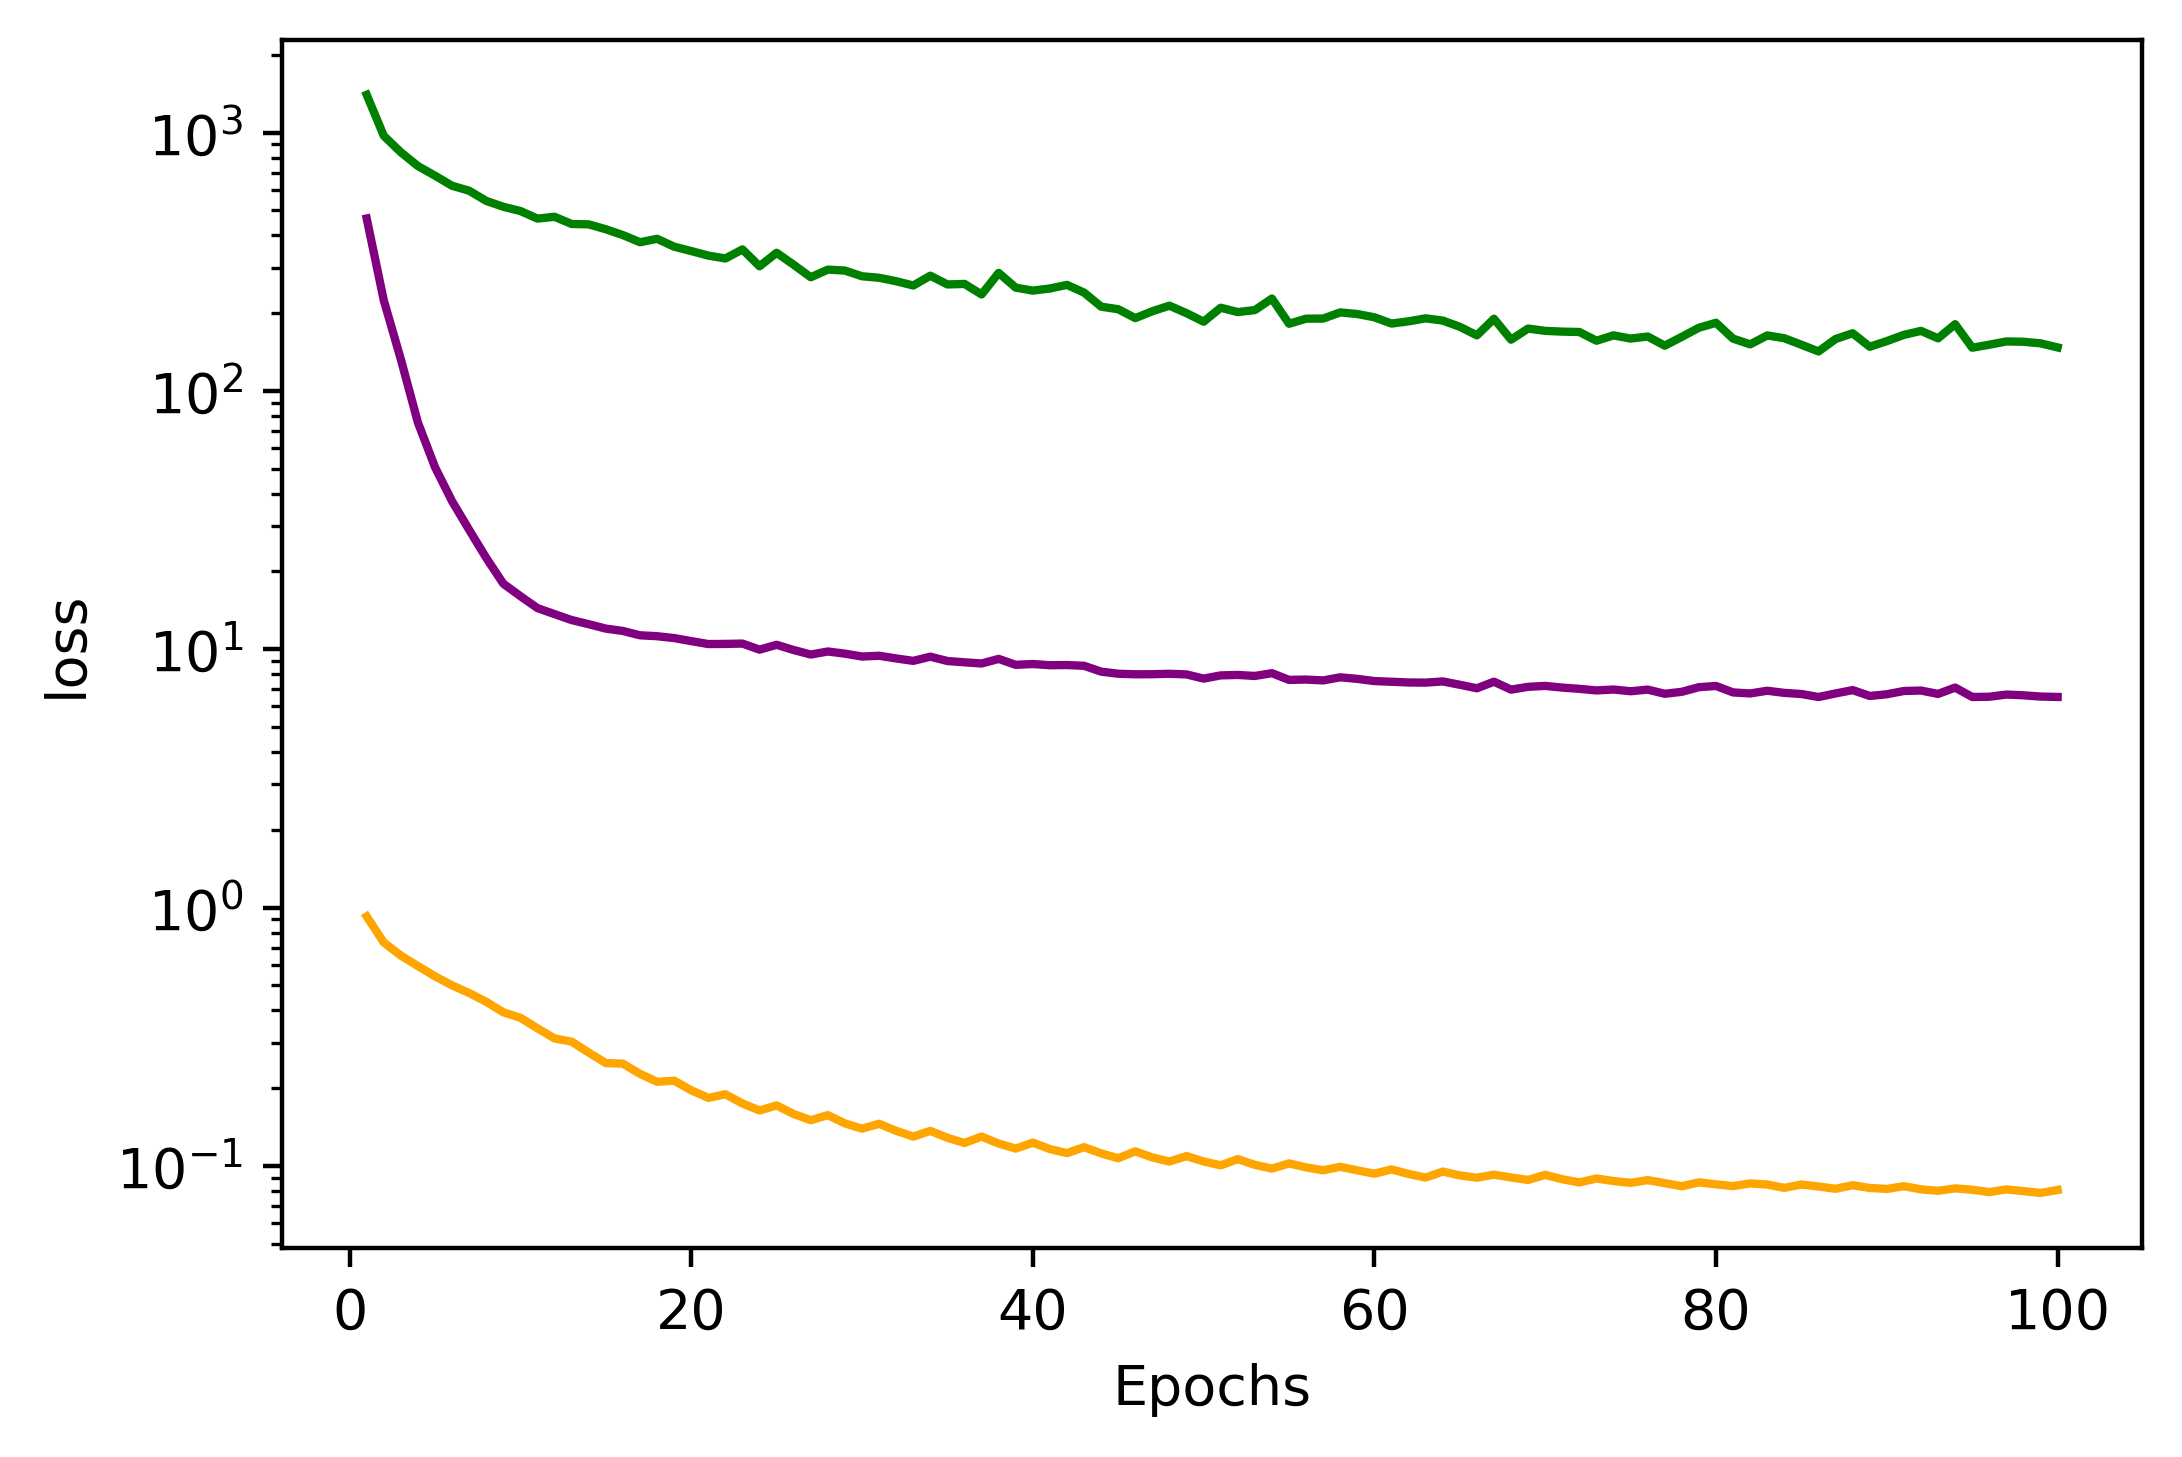

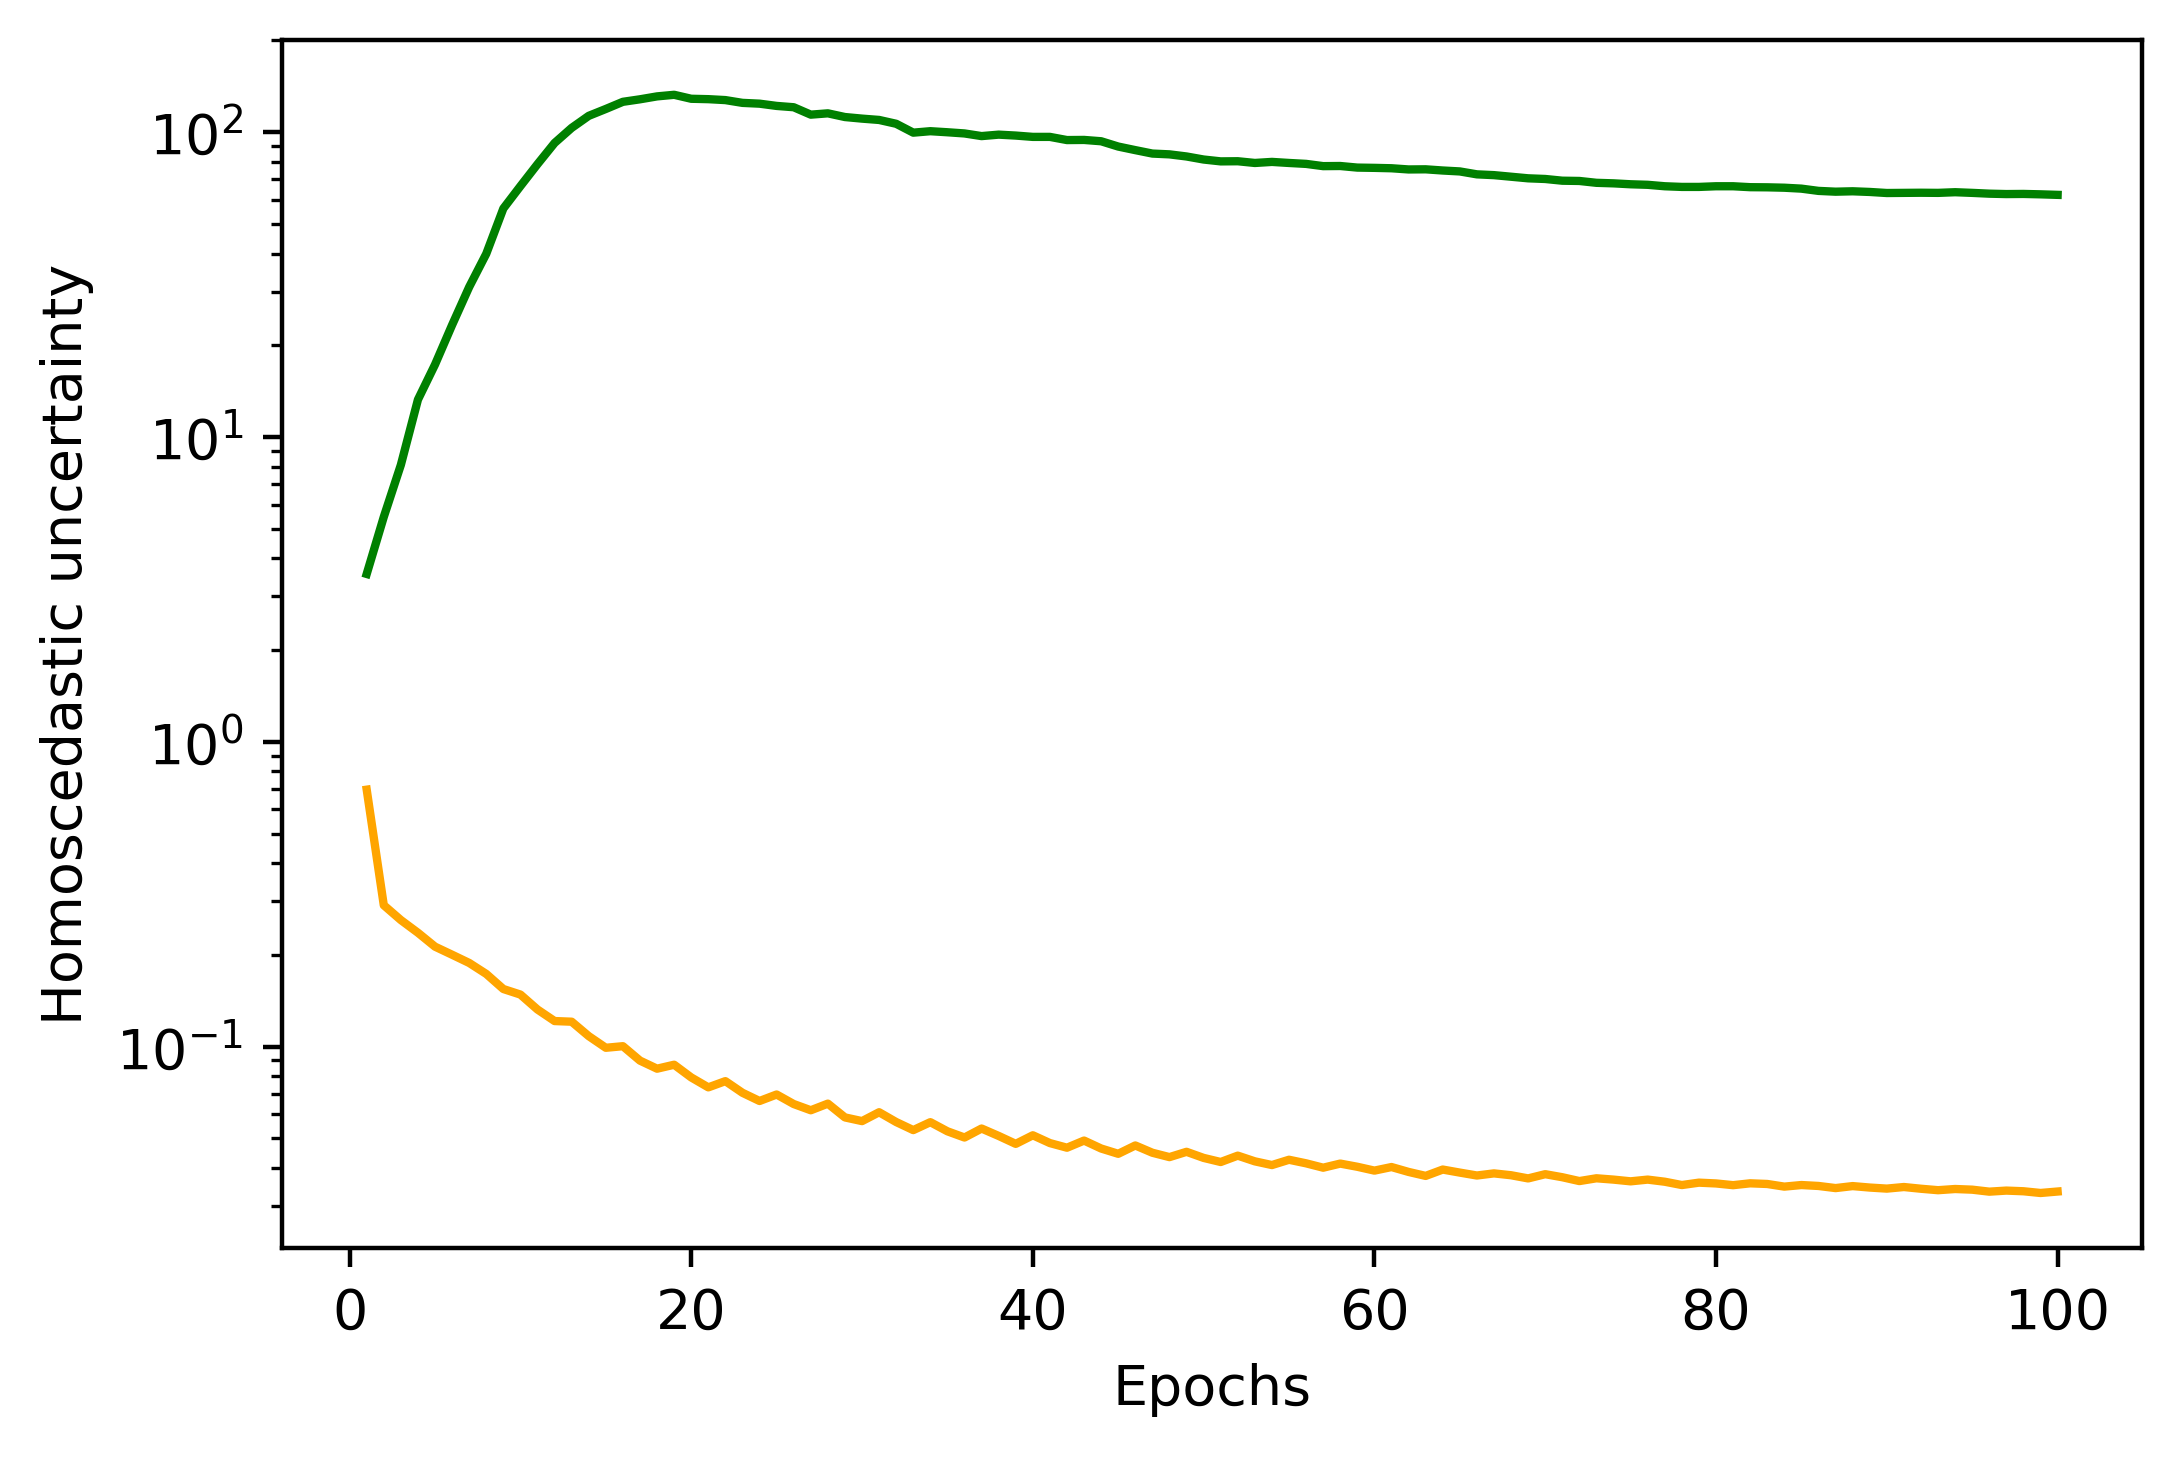

In [4]:
"""
def plot_summary_first(epoch_dict, labels, line_style, ylabel, log_scale = False):
    plt.figure(dpi=400)
    for label, style in zip(labels, line_style):
        keys = []
        sub_values = []
        for key, value in epoch_dict.items():
            keys.append(key)
            sub_values.append(epoch_dict[key][label])
        if style[1]:
            plt.plot(keys, sub_values, label=label, 
                     color = style[0], marker = style[1], markersize = 1.5, linewidth = 0.3, markevery=1)
        else:
            plt.plot(keys, sub_values, label=label, color = style[0])
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    if log_scale:
        plt.yscale('log')
    plt.legend()
"""

log_path = os.path.join(target_dir, 'log_train_second.txt')
f = open(log_path, 'r')
train_log = f.readlines()
f.close()
epoch_dict = dict()
for i, line in enumerate(train_log):
    if 'epoch: ' in line:
        number = int(line.strip('\n').split(': ')[-1])
        epoch_dict[number] = dict()
        epoch_dict[number]['ranking loss'] = float(train_log[i+1].strip('\n').split(': ')[-1])
        epoch_dict[number]['temperature loss'] = float(train_log[i+2].strip('\n').split(': ')[-1])
        epoch_dict[number]['combined multitask loss'] = float(train_log[i+3].strip('\n').split(': ')[-1])
        epoch_dict[number]['variance of uncertainty of ranking task'] = np.exp(float(train_log[i+4].strip('\n').split(': ')[-1]))
        epoch_dict[number]['variance of uncertainty of temperature task'] = np.exp(float(train_log[i+5].strip('\n').split(': ')[-1]))

plot_summary_first(epoch_dict, labels = ['ranking loss', 'temperature loss', 'combined multitask loss'], 
                    line_style = [('orange',None), ('green',None), ('purple',None)],
                    ylabel='loss', log_scale = True, legend = False)

plot_summary_first(epoch_dict, labels = ['variance of uncertainty of ranking task',
                                         'variance of uncertainty of temperature task'], 
                    line_style = [('orange',None), ('green',None)],
                    ylabel='Homoscedastic uncertainty', log_scale = True, legend = False)